## 11 대중교통 데이터 시각화하기

### (2) 지하철 유무임별 이용현황 데이터 정제하기

In [1]:
# 콤마 제거
## row[4] = int(row[4].replace(',', ''))

In [2]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)

for row in data :
    print(row)

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jan-19', '1호선', '150', '서울역', '1516452', '1400464', '221180', '211764']
['Jan-19', '1호선', '151', '시청', '676932', '676266', '102388', '101033']
['Jan-19', '1호선', '152', '종각', '1240810', '1177643', '162410', '152062']
['Jan-19', '1호선', '153', '종로3가', '703110', '674148', '387062', '362735']
['Jan-19', '1호선', '154', '종로5가', '571824', '583955', '275447', '263687']
['Jan-19', '1호선', '155', '동대문', '308301', '342898', '134071', '138633']
['Jan-19', '1호선', '156', '신설동', '360561', '353834', '126466', '120147']
['Jan-19', '1호선', '157', '제기동', '293540', '288217', '374571', '400607']
['Jan-19', '1호선', '158', '청량리(서울시립대입구)', '463456', '482960', '352121', '357571']
['Jan-19', '1호선', '159', '동묘앞', '174683', '188711', '146034', '147551']
['Jan-19', '2호선', '201', '시청', '706097', '679503', '61058', '55387']
['Jan-19', '2호선', '202', '을지로입구', '1415414', '1414980', '120425', '111592']
['Jan-19', '2호선', '203', '을지로3가', '608979', '601323', '91668

In [10]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data) # 두 번째 줄부터 데이터를 다루기 위한 코드

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    print(row)

['Jan-19', '1호선', '150', '서울역', 1516452, 1400464, 221180, 211764]
['Jan-19', '1호선', '151', '시청', 676932, 676266, 102388, 101033]
['Jan-19', '1호선', '152', '종각', 1240810, 1177643, 162410, 152062]
['Jan-19', '1호선', '153', '종로3가', 703110, 674148, 387062, 362735]
['Jan-19', '1호선', '154', '종로5가', 571824, 583955, 275447, 263687]
['Jan-19', '1호선', '155', '동대문', 308301, 342898, 134071, 138633]
['Jan-19', '1호선', '156', '신설동', 360561, 353834, 126466, 120147]
['Jan-19', '1호선', '157', '제기동', 293540, 288217, 374571, 400607]
['Jan-19', '1호선', '158', '청량리(서울시립대입구)', 463456, 482960, 352121, 357571]
['Jan-19', '1호선', '159', '동묘앞', 174683, 188711, 146034, 147551]
['Jan-19', '2호선', '201', '시청', 706097, 679503, 61058, 55387]
['Jan-19', '2호선', '202', '을지로입구', 1415414, 1414980, 120425, 111592]
['Jan-19', '2호선', '203', '을지로3가', 608979, 601323, 91668, 91016]
['Jan-19', '2호선', '204', '을지로4가', 278663, 281834, 98689, 94261]
['Jan-19', '2호선', '205', '동대문역사문화공원', 470548, 540467, 58918, 62861]
['Jan-19', '2호선', '206

### (3) 유임 승차 비율이 가장 높은 역은 어디일까

In [11]:
# 유임 승차 비율 rate를 계산하는 방법은 다양함
# 'rate = 유임승차인원 / 무임승차인원'을 사용할 예정임

# 알고리즘
# 1. 데이터를 읽어온다.
# 2. 모든 역의 데이터를 바탕으로 각 역의 rate를 계산한다.
# 3. 비율이 가장 높은 역을 찾는다.
# 4. 비율이 가장 높은 역은 어디인지, 그 비율이 얼마인지 출력한다.

import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    rate = row[4] / row[6]
    if rate > mx :
        mx = rate
print(mx)

# division by zero 오류 발생

ZeroDivisionError: division by zero

In [13]:
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] == 0 :
        print(row)
        
# row[6] 값이 0인 역이 존재

['Jan-19', '분당선', '1031', '복정', 25, 0, 0, 0]
['Jan-19', '일산선', '1949', '지축', 2, 0, 0, 0]
['Jan-19', '경의선', '1291', '서울역', 11, 0, 0, 0]
['Jan-19', '경의선', '1293', '홍대입구', 2, 0, 0, 0]
['Jan-19', '경의선', '1295', '김포공항', 10, 0, 0, 0]
['Jan-19', '경의선', '1296', '계양', 7, 0, 0, 0]
['Jan-19', '경의선', '1297', '검암', 5, 0, 0, 0]


In [15]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] !=0 : # 만약 row[6](무임 승차 인원) 값이 0이 아니라면
        rate = row[4] / row[6]
        if rate > mx : # 만약 rate 값이 mx 값보다 크다면
            mx = rate # mx 값을 rate 값으로 업데이트
            print(row, round(rate, 2)) # 업데이트된 값 출력하기
            
# 충무로역의 데이터가 이상함
# 3호선 충무로역의 유임하차, 무임하차 값이 모두 0임
# 충무로역은 3호선과 4호선이 운행되는 환승역으로, 4호선 충무로역의 값과 함께 처리해야할 것임

['Jan-19', '1호선', '150', '서울역', 1516452, 1400464, 221180, 211764] 6.86
['Jan-19', '1호선', '152', '종각', 1240810, 1177643, 162410, 152062] 7.64
['Jan-19', '2호선', '201', '시청', 706097, 679503, 61058, 55387] 11.56
['Jan-19', '2호선', '202', '을지로입구', 1415414, 1414980, 120425, 111592] 11.75
['Jan-19', '2호선', '209', '한양대', 233785, 256079, 15380, 16652] 15.2
['Jan-19', '2호선', '222', '강남', 3153418, 3210437, 186486, 167666] 16.91
['Jan-19', '2호선', '239', '홍대입구', 2351935, 2507561, 114832, 111488] 20.48
['Jan-19', '3호선', '321', '충무로', 55, 0, 2, 0] 27.5


In [20]:
# 따라서 전체 인원 중 유임 승차 인원을 구하는 방법으로 데이터를 다뤄봄
# rate = 유임 승차 인원 / 전체(유임+무임) 인원

import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] !=0 and (row[4]+row[6]) > 10000: # 유무임 승차 인원을 합해서 100,000명 이상인 경우만 찾음
        rate = row[4] / (row[4] + row[6])
        if rate > mx :
            mx = rate
            print(row, round(rate, 2))
            
# 홍대입구역의 rate 가 0.95로 가장 높음
# 유임 승차 비율이 높은 역은 홍대입구역 하나일까?

['Jan-19', '1호선', '150', '서울역', 1516452, 1400464, 221180, 211764] 0.87
['Jan-19', '1호선', '152', '종각', 1240810, 1177643, 162410, 152062] 0.88
['Jan-19', '2호선', '201', '시청', 706097, 679503, 61058, 55387] 0.92
['Jan-19', '2호선', '202', '을지로입구', 1415414, 1414980, 120425, 111592] 0.92
['Jan-19', '2호선', '209', '한양대', 233785, 256079, 15380, 16652] 0.94
['Jan-19', '2호선', '222', '강남', 3153418, 3210437, 186486, 167666] 0.94
['Jan-19', '2호선', '239', '홍대입구', 2351935, 2507561, 114832, 111488] 0.95


In [21]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] !=0 and (row[4]+row[6]) > 10000:
        rate = row[4] / (row[4] + row[6])
        if rate > 0.94 : # if 조건문 변경
            mx = rate
            print(row, round(rate, 2))
            
# 위와 다른 결과 도출

['Jan-19', '2호선', '222', '강남', 3153418, 3210437, 186486, 167666] 0.94
['Jan-19', '2호선', '239', '홍대입구', 2351935, 2507561, 114832, 111488] 0.95
['Jan-19', '경부선', '1001', '서울역', 178223, 29980, 10325, 1612] 0.95
['Jan-19', '9호선', '4125', '신논현', 965930, 995451, 57013, 54557] 0.94
['Jan-19', '공항철도 1호선', '4203', '홍대입구', 336328, 335507, 17545, 17112] 0.95
['Jan-19', '공항철도 1호선', '4206', '마곡나루', 133488, 119389, 8060, 8192] 0.94
['Jan-19', '공항철도 1호선', '4207', '김포공항', 300654, 196229, 18640, 14332] 0.94
['Jan-19', '공항철도 1호선', '4210', '청라국제도시', 174320, 164483, 9921, 9676] 0.95


#### 유임 승차 비율이 가장 높은 역 찾기

In [23]:
import csv

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

mx = 0
rate = 0
mx_station = ''

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] !=0 and (row[4]+row[6]) > 10000:
        rate = row[4] / (row[4] + row[6])
        if rate > mx :
            mx = rate
            mx_station = row[3] + ' ' + row[1] # rate가 가장 높은 역 이름과 호선 저장
            
print(mx_station, round(mx*100,2))

홍대입구 2호선 95.34


### (4) 유무임 승하차 인원이 가장 많은 역은 어디일까

In [25]:
import csv

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

mx = [0] * 4
mx_station = [''] * 4

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
        if row[i] > mx[i-4] :
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]

for i in range(4) :
    print(mx_station[i], mx[i])

강남 2호선 3153418
강남 2호선 3210437
종로3가 1호선 387062
제기동 1호선 400607


#### 유무임 승하차 인원이 가장 많은 역 찾기

In [26]:
import csv

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

mx = [0] * 4
mx_station = [''] * 4
label = ['유임승차', '무임승차', '유임하차', '무임하차']

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
        if row[i] > mx[i-4] :
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]

for i in range(4) :
    print(label[i] + ' : ' + mx_station[i], mx[i])

유임승차 : 강남 2호선 3153418
무임승차 : 강남 2호선 3210437
유임하차 : 종로3가 1호선 387062
무임하차 : 제기동 1호선 400607


### (5) 모든 역의 유무임 승하차 비율은 어떻게 될까

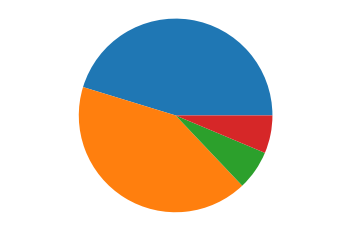

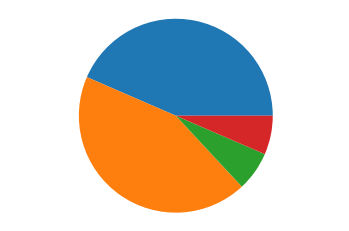

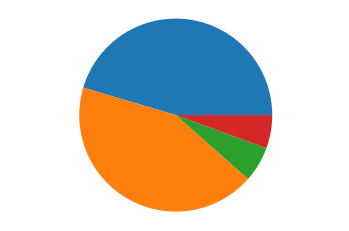

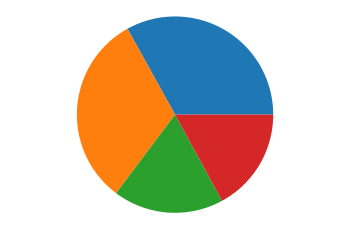

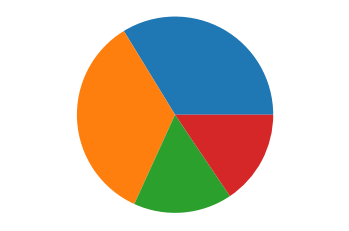

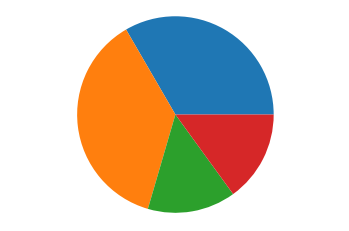

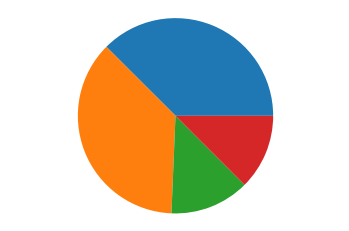

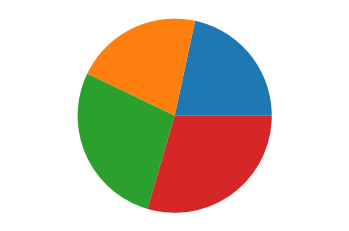

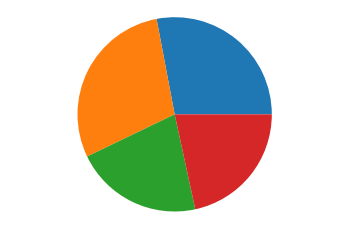

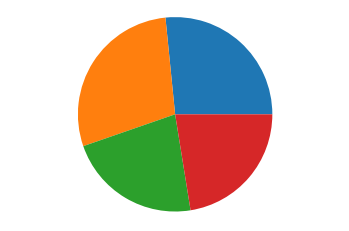

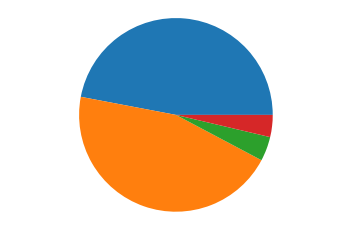

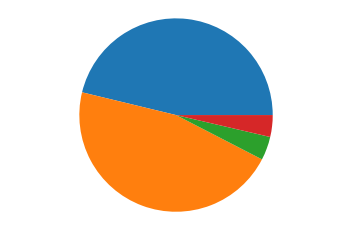

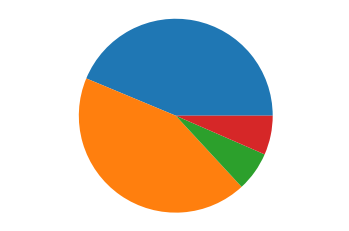

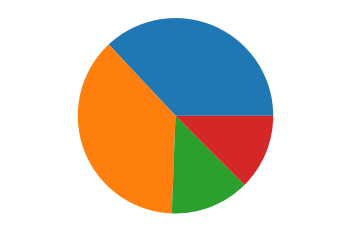

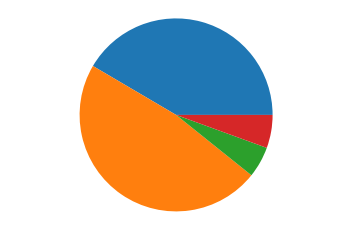

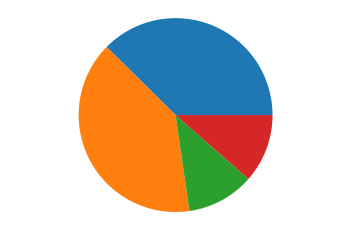

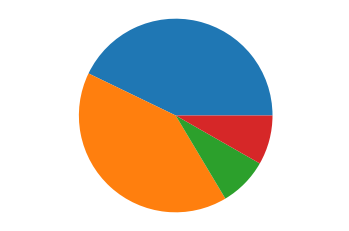

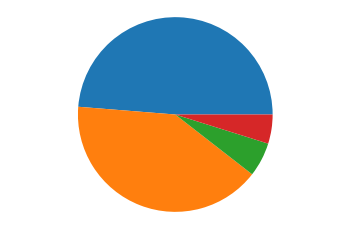

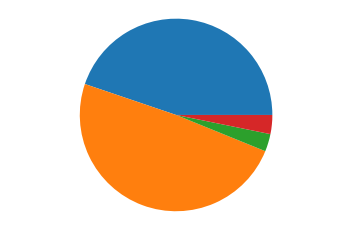

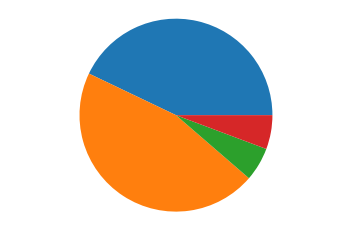

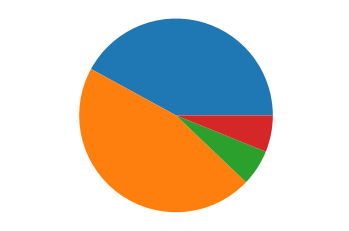

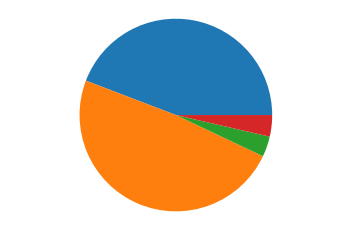

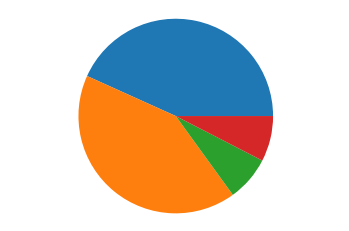

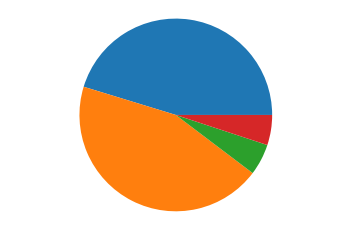

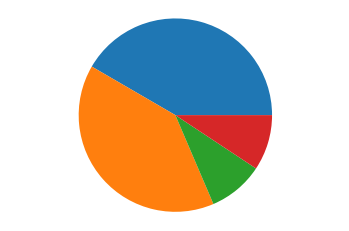

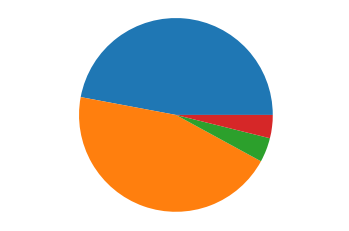

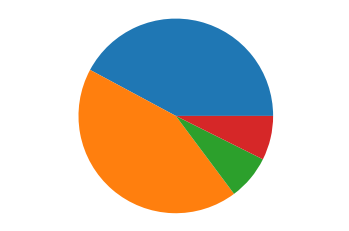

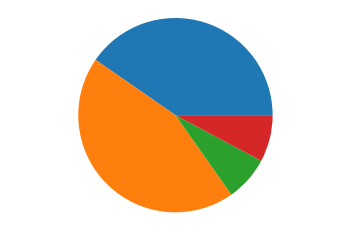

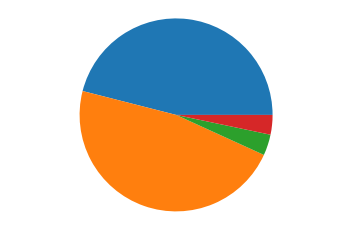

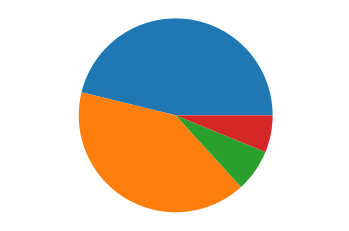

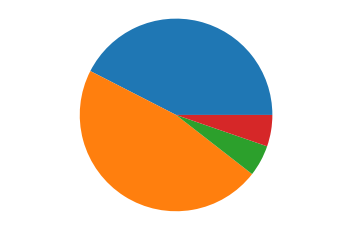

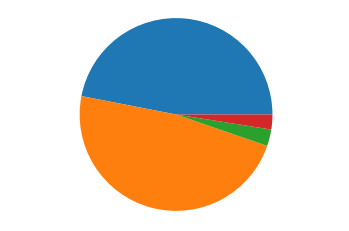

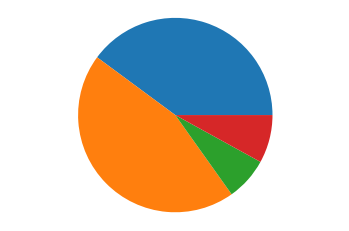

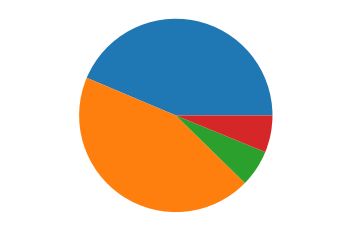

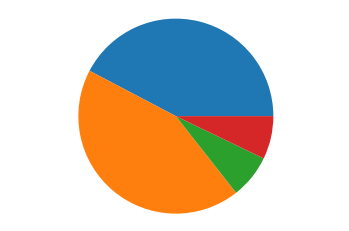

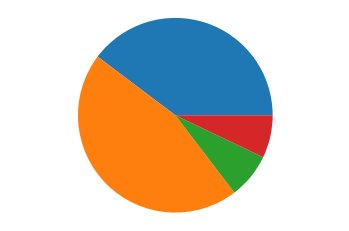

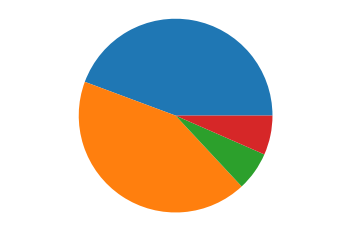

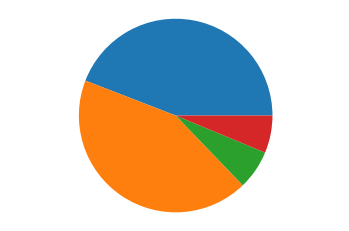

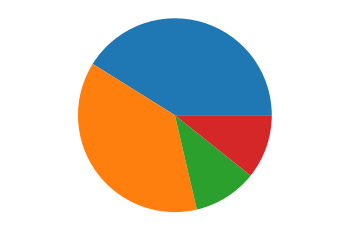

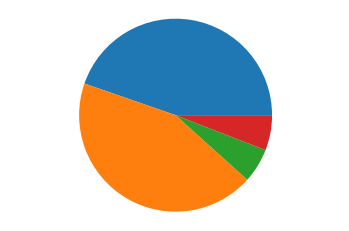

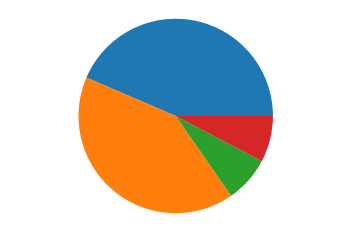

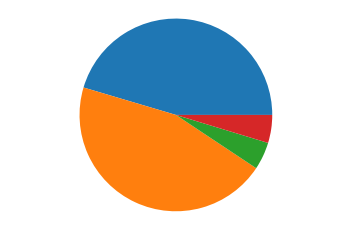

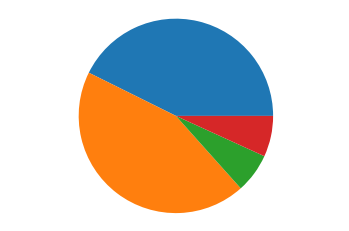

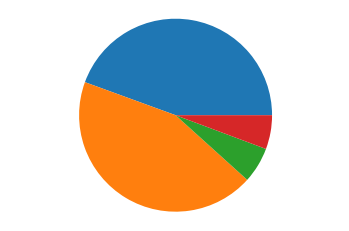

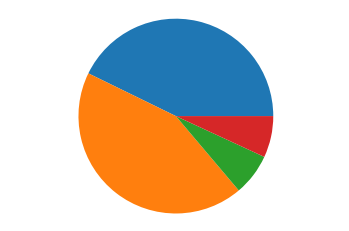

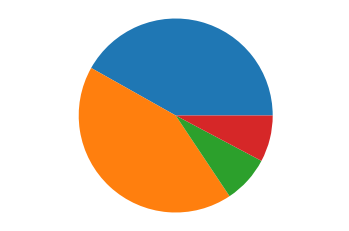

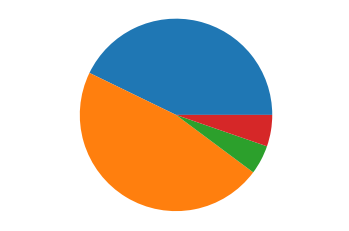

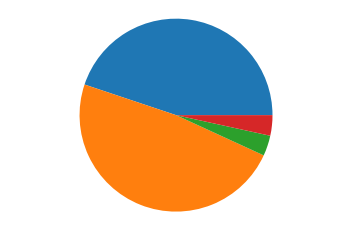

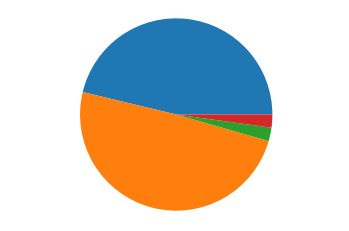

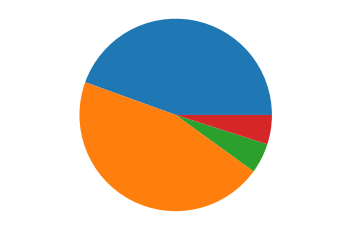

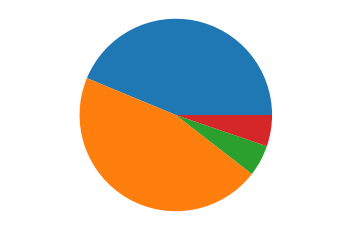

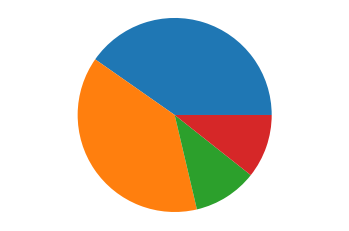

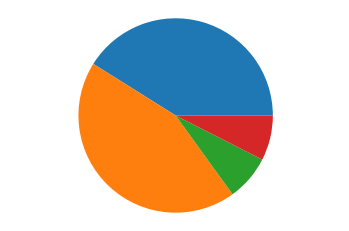

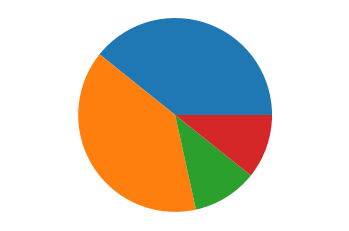

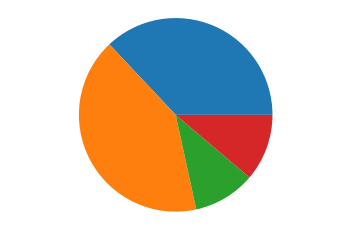

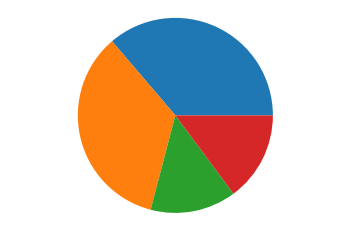

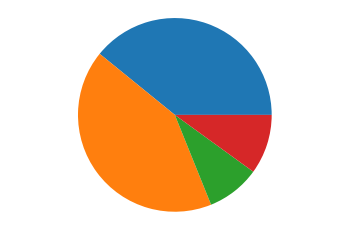

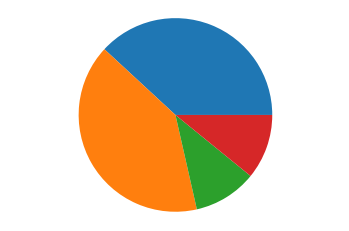

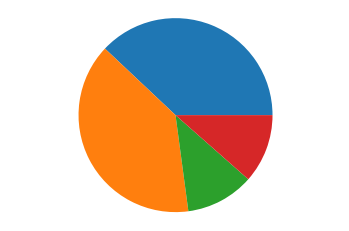

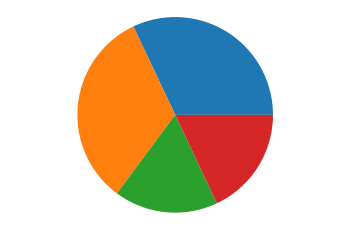

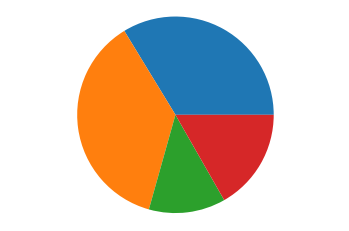

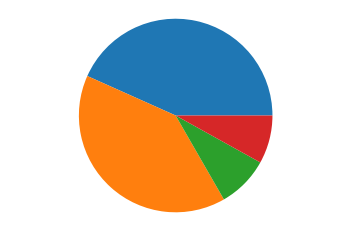

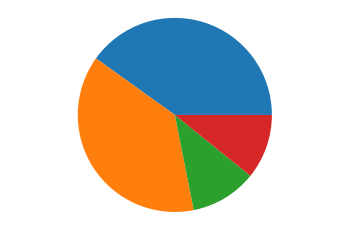

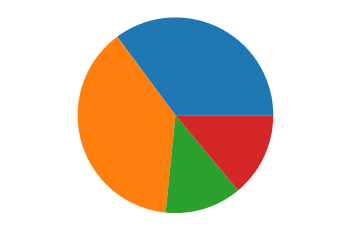

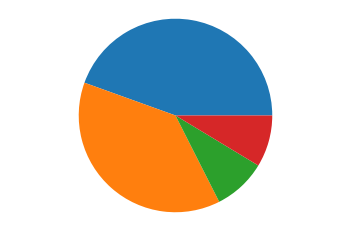

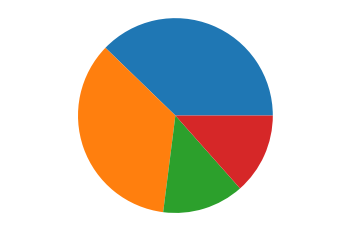

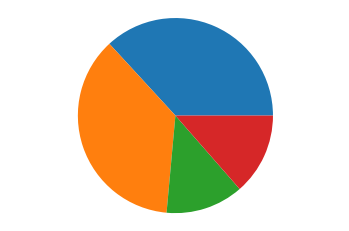

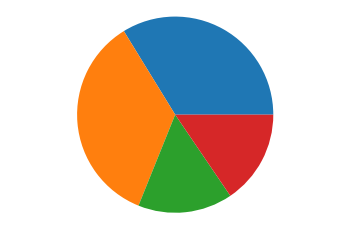

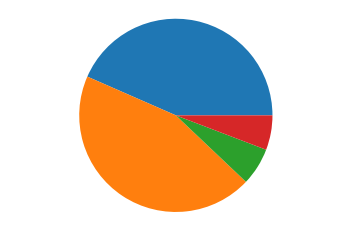

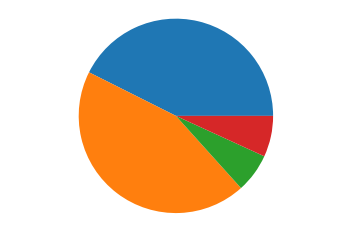

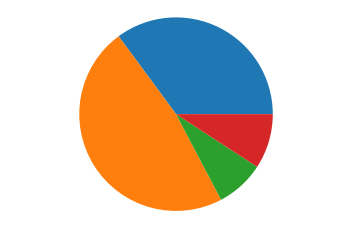

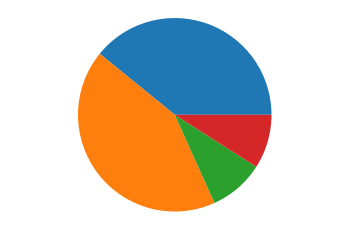

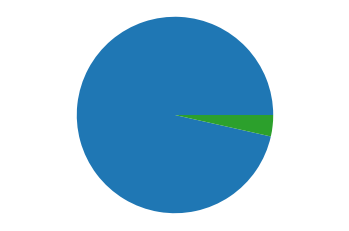

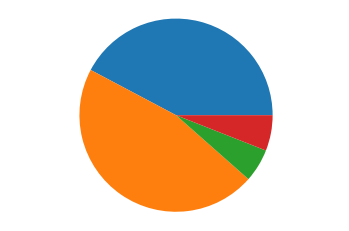

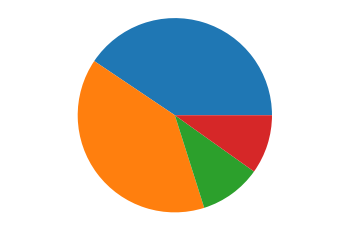

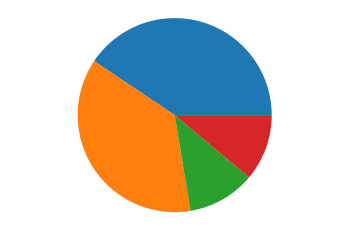

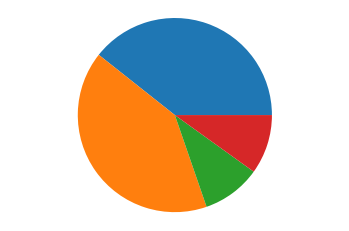

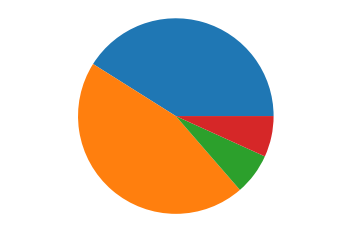

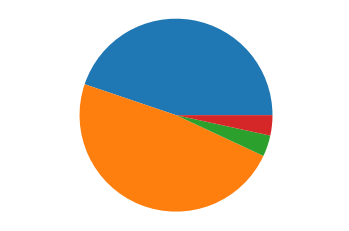

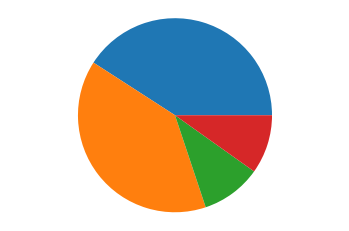

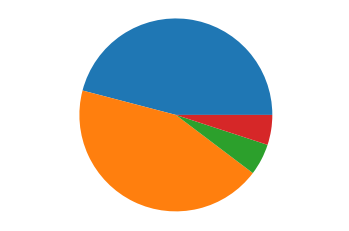

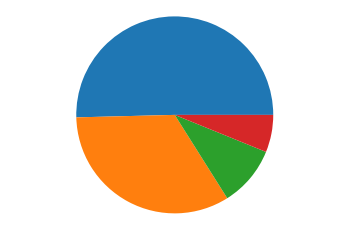

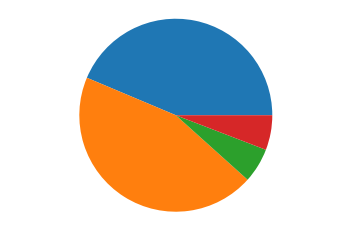

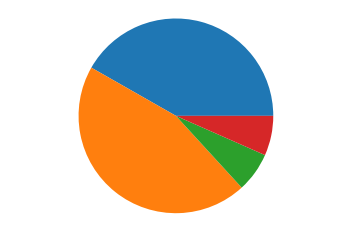

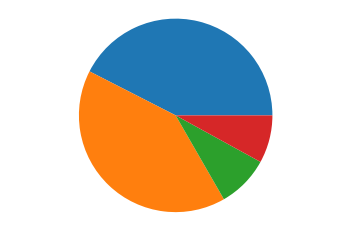

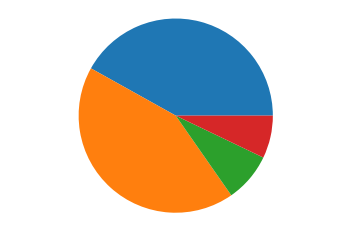

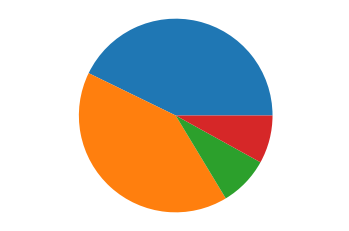

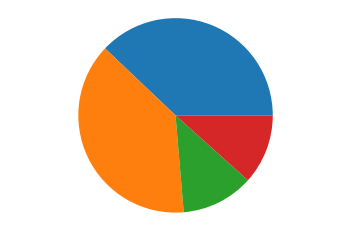

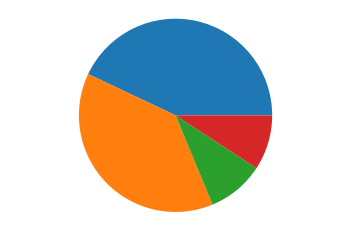

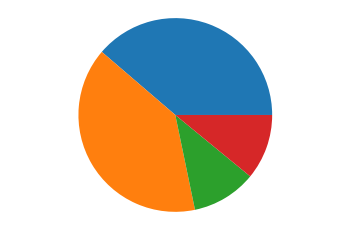

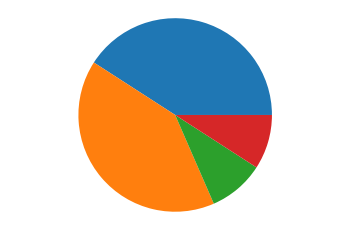

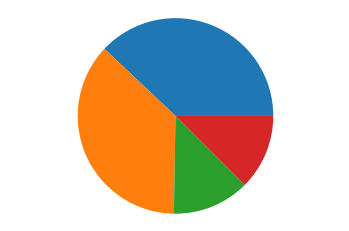

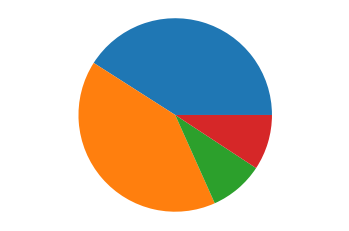

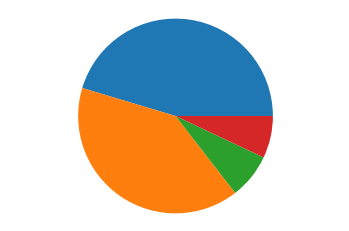

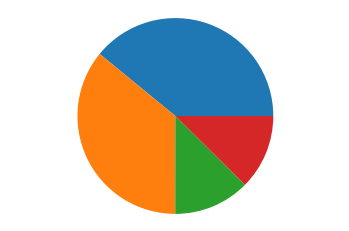

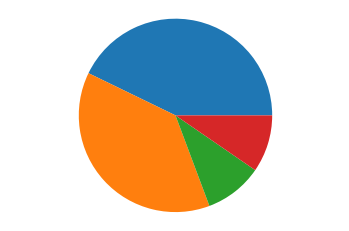

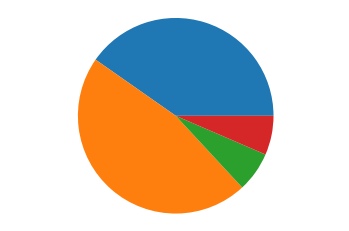

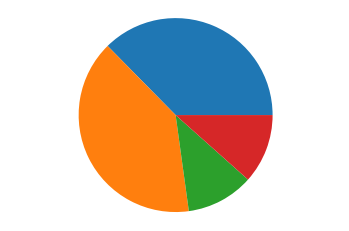

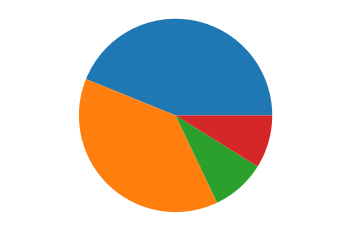

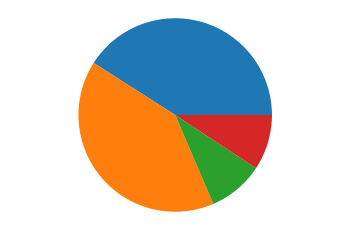

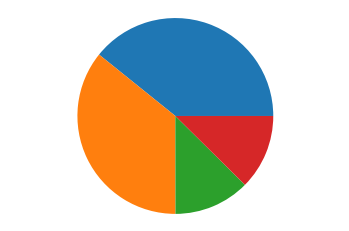

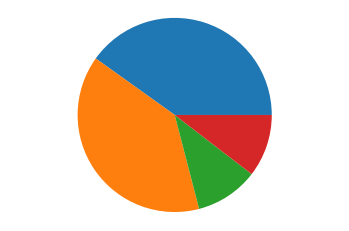

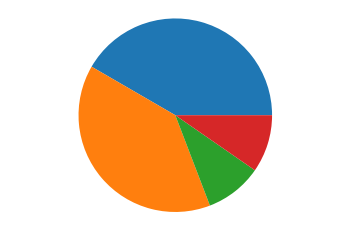

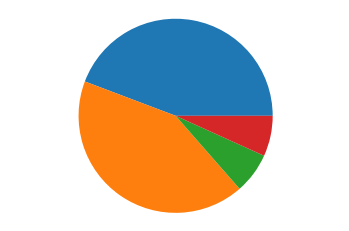

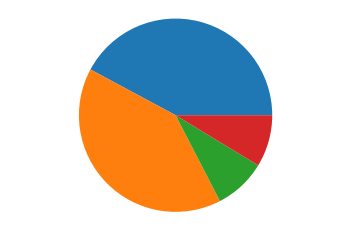

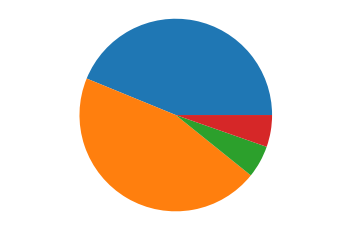

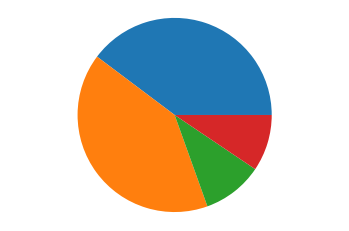

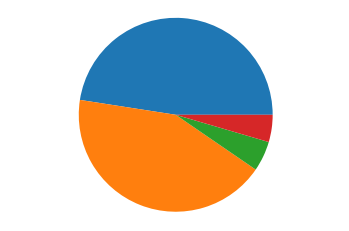

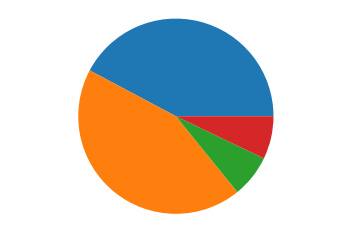

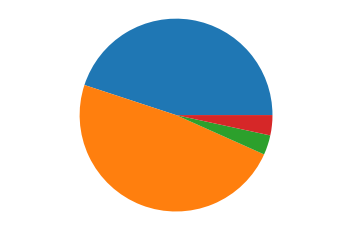

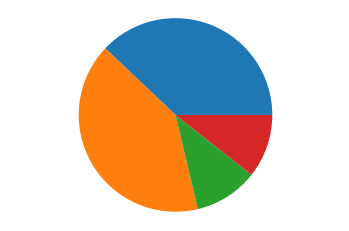

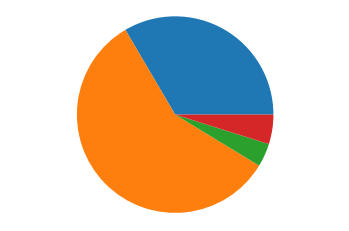

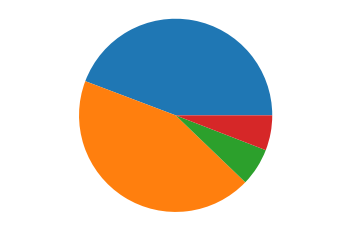

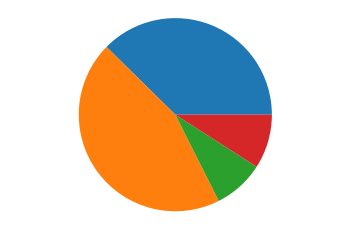

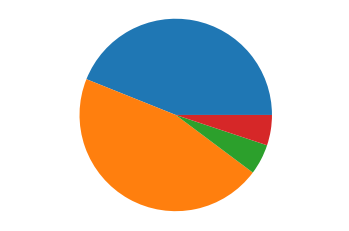

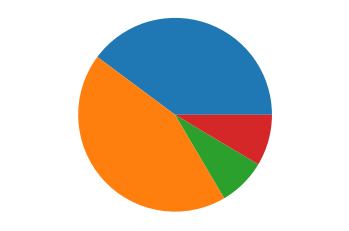

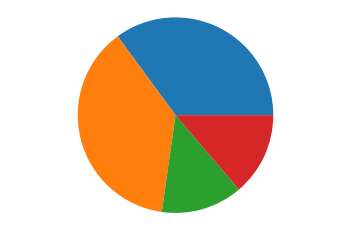

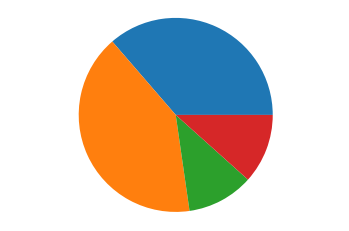

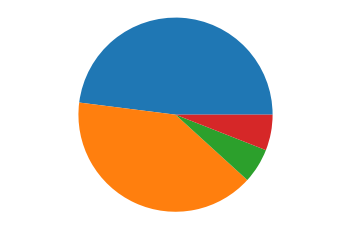

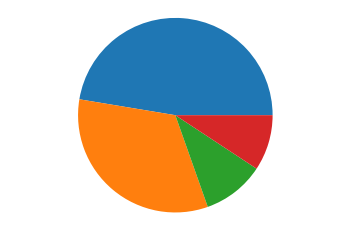

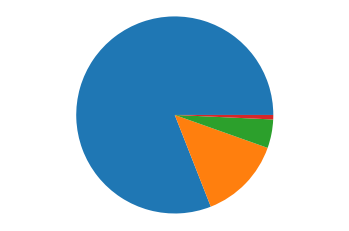

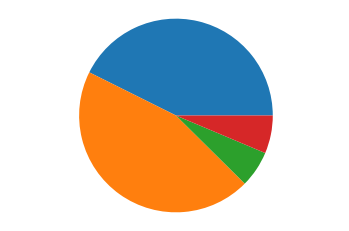

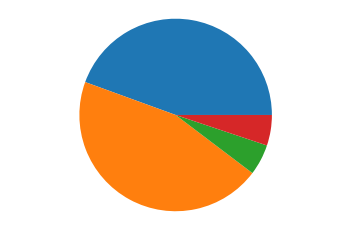

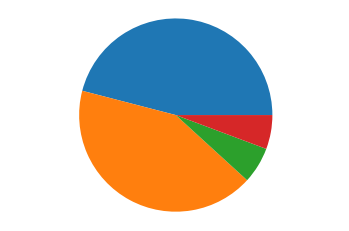

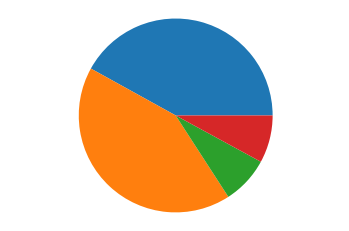

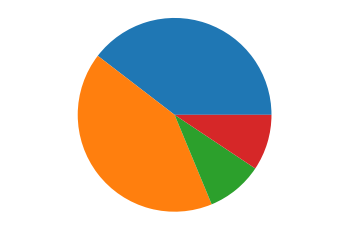

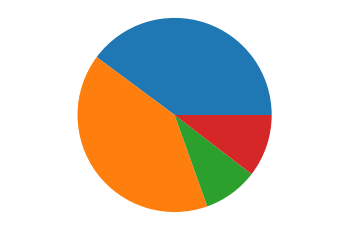

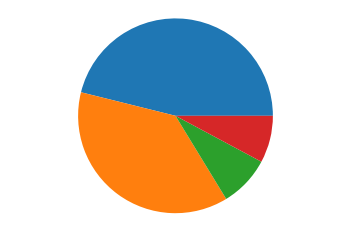

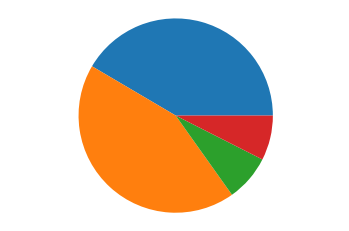

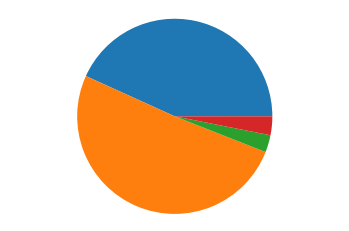

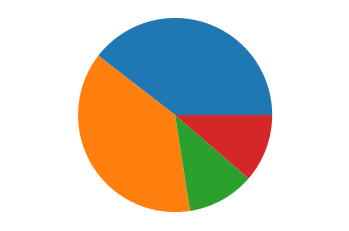

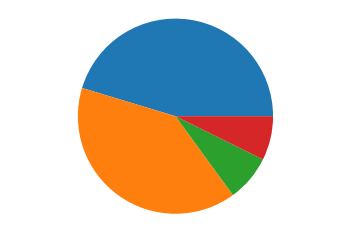

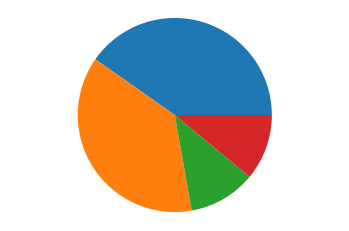

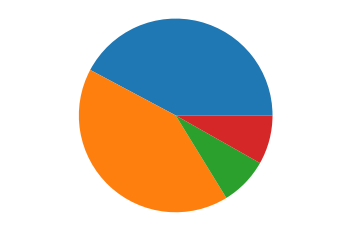

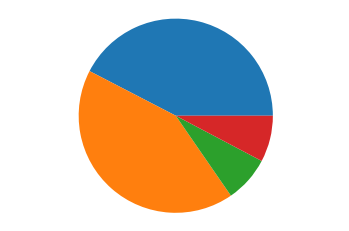

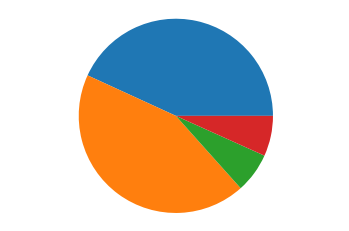

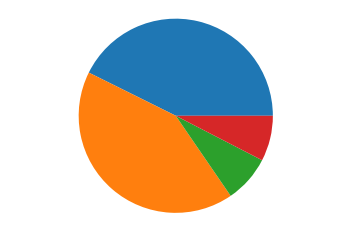

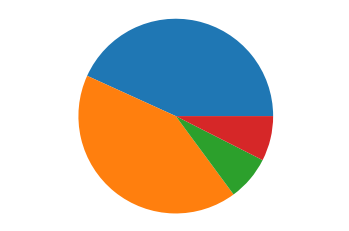

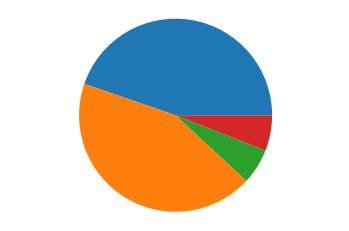

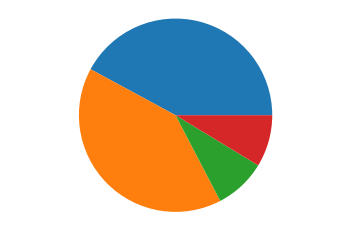

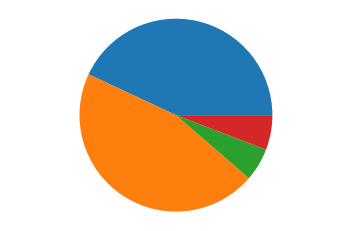

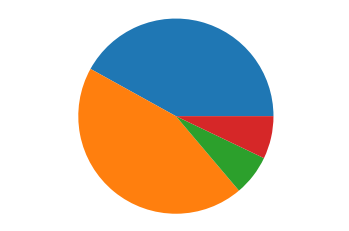

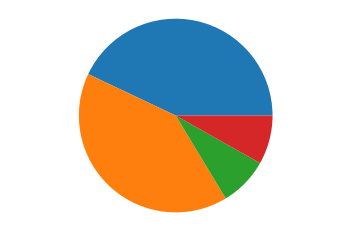

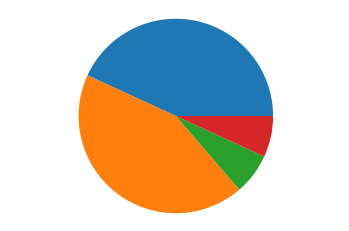

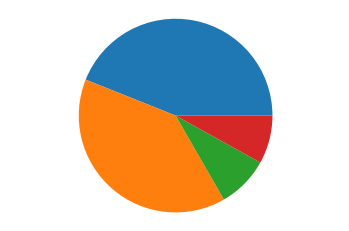

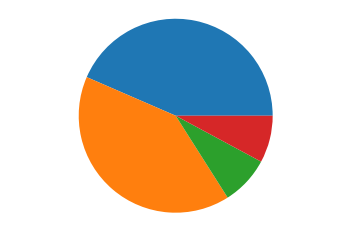

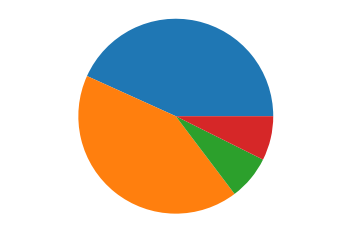

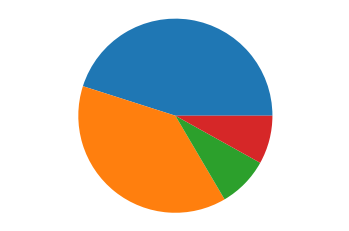

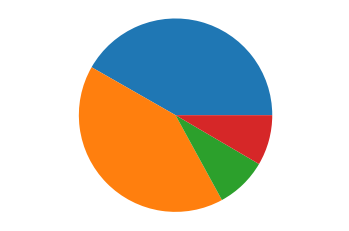

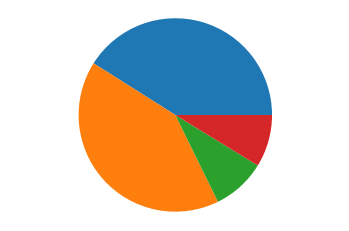

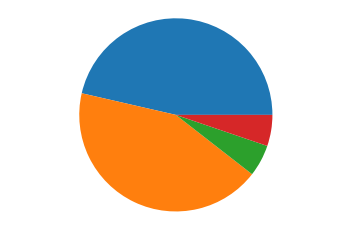

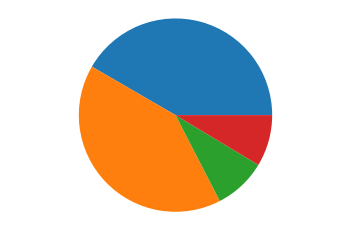

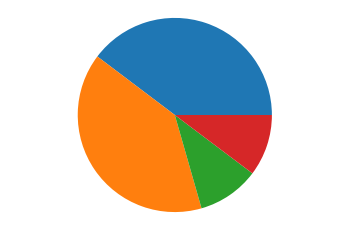

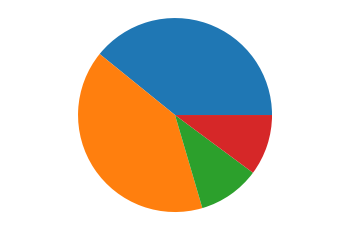

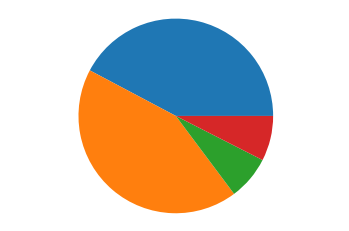

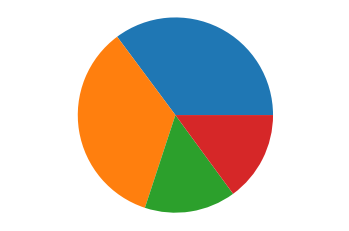

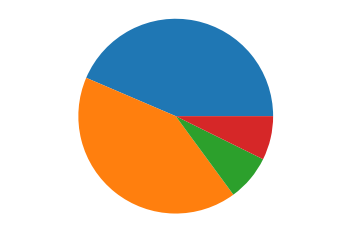

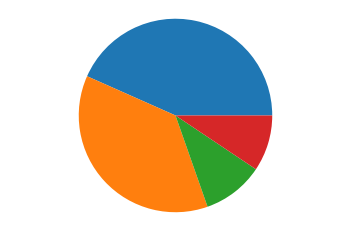

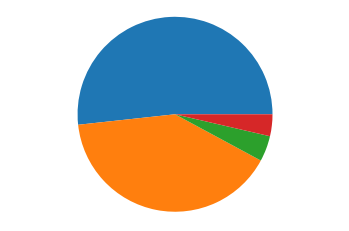

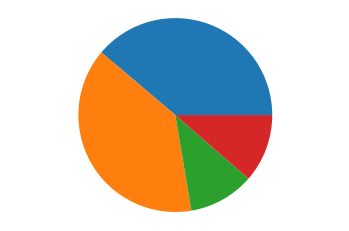

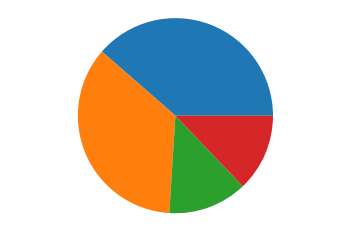

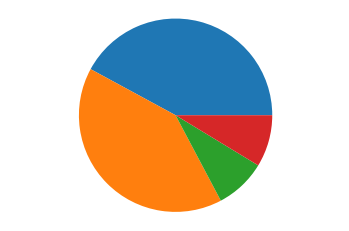

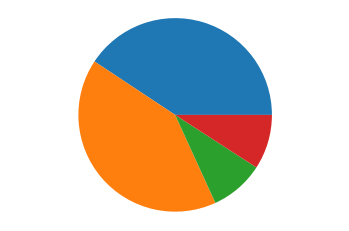

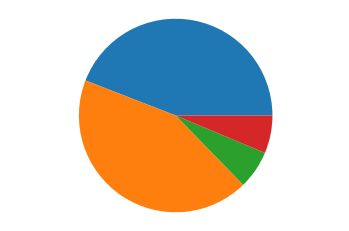

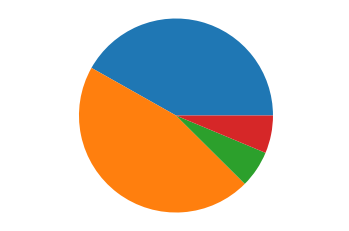

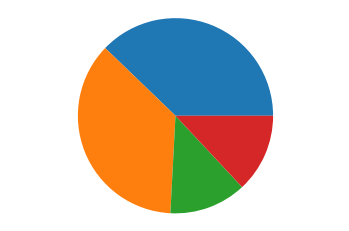

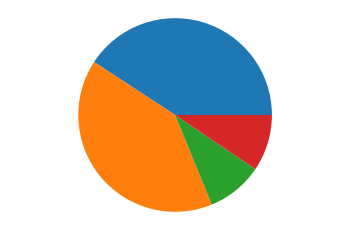

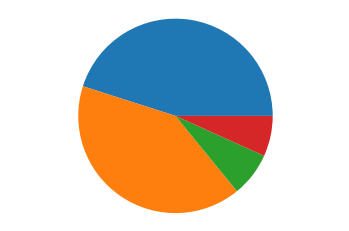

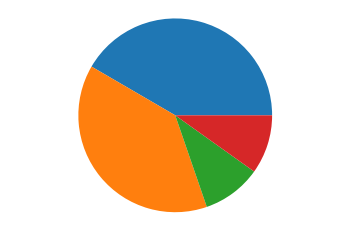

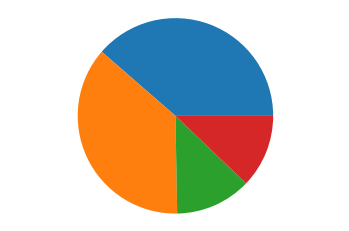

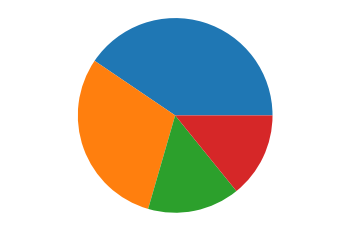

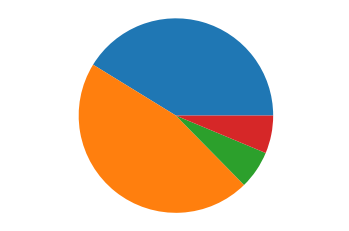

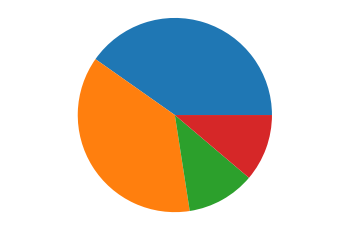

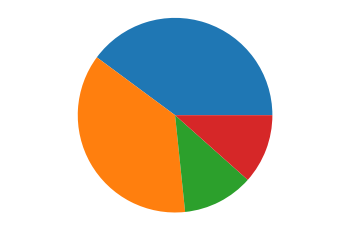

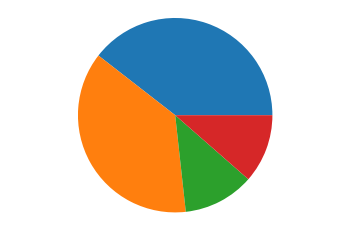

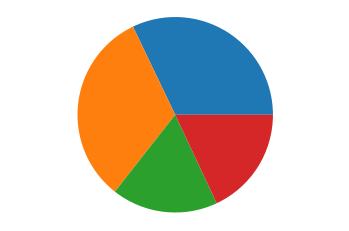

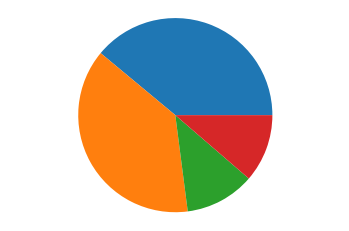

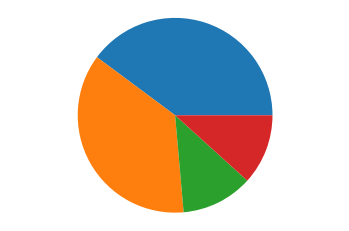

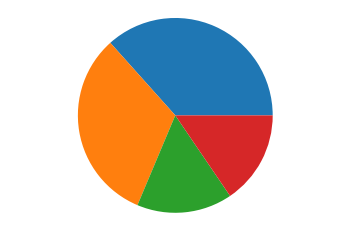

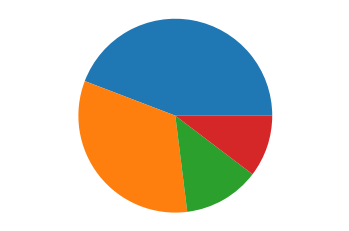

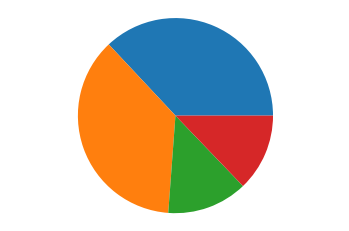

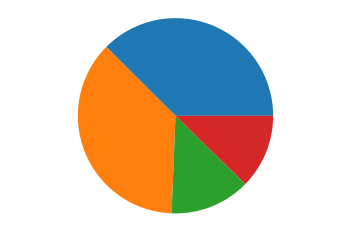

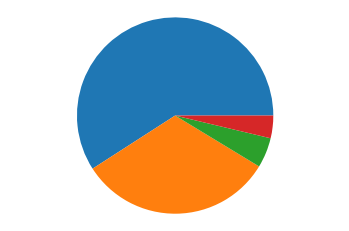

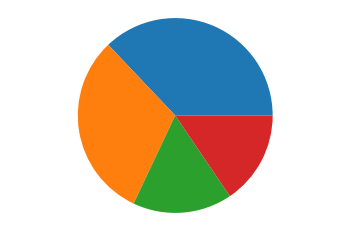

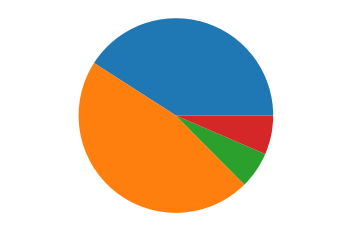

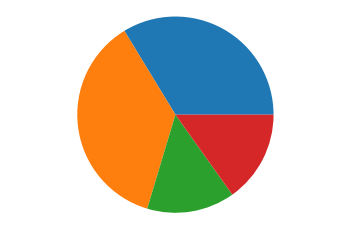

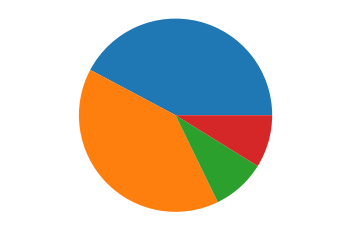

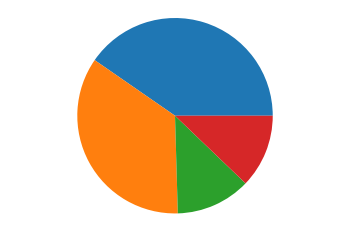

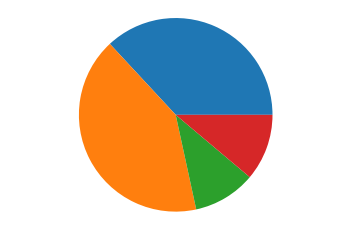

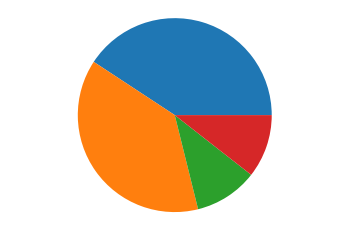

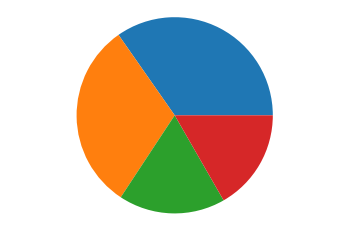

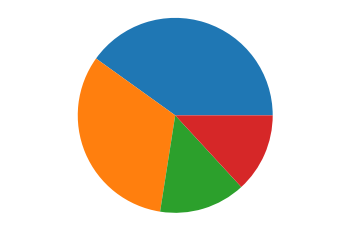

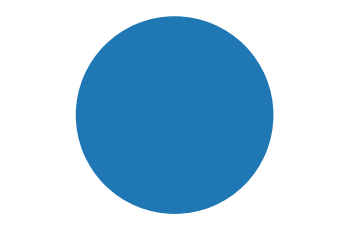

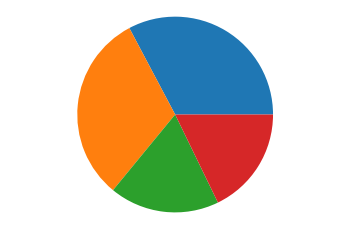

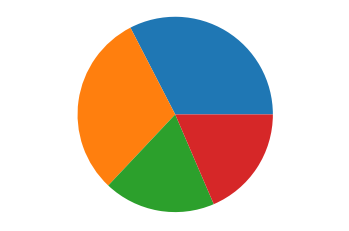

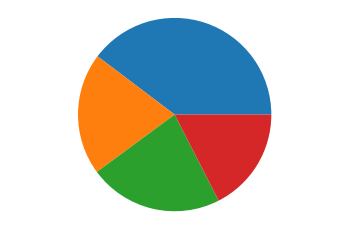

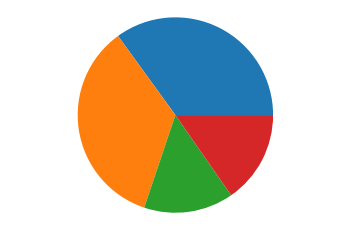

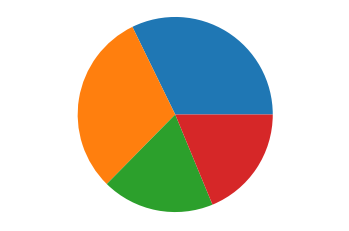

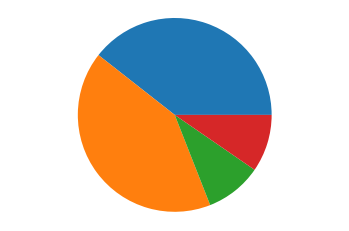

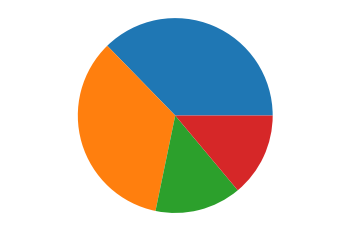

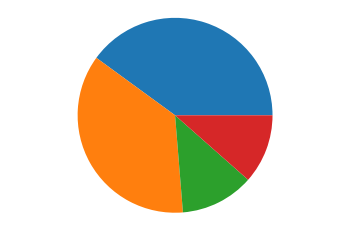

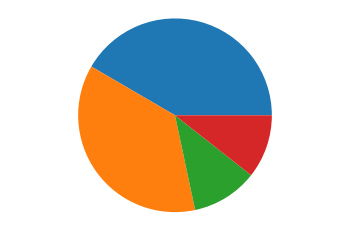

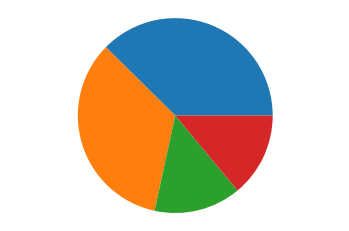

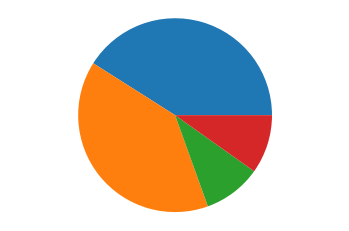

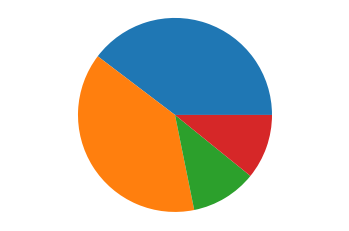

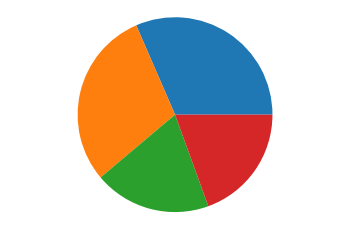

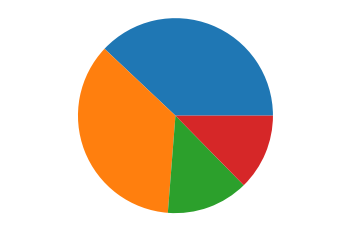

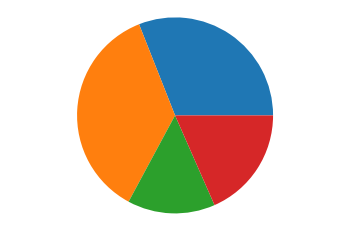

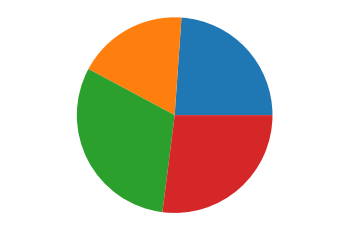

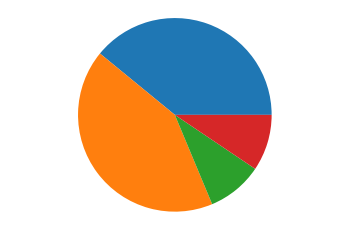

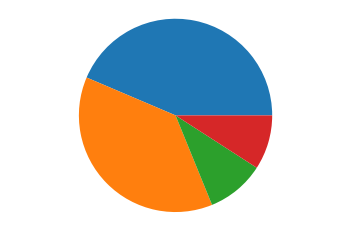

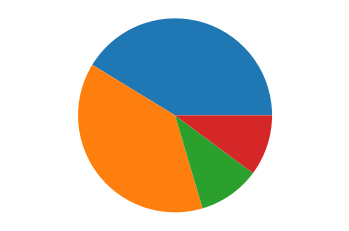

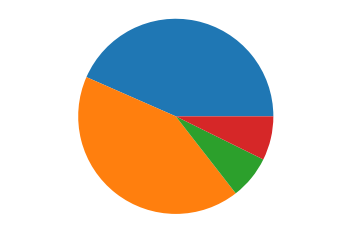

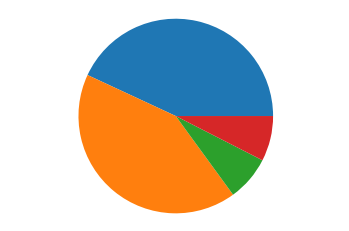

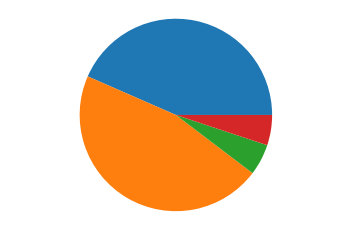

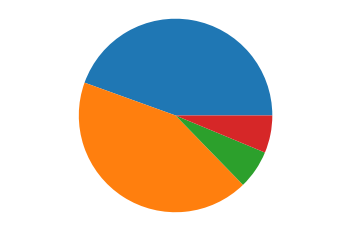

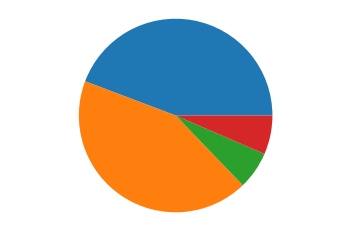

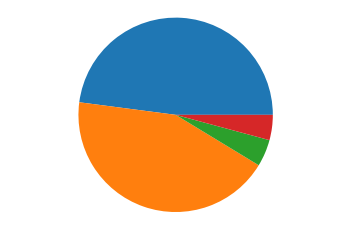

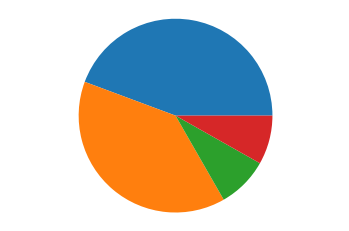

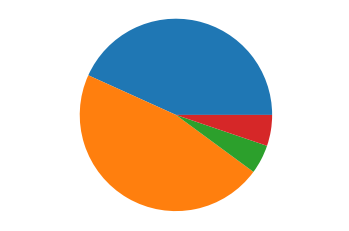

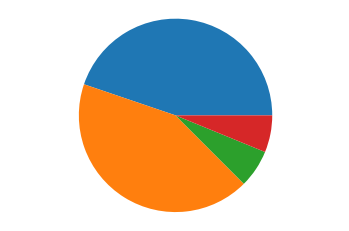

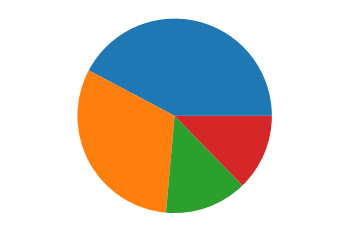

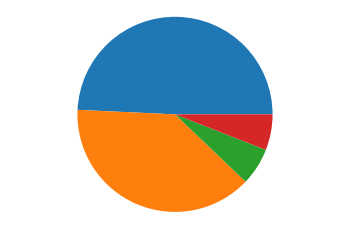

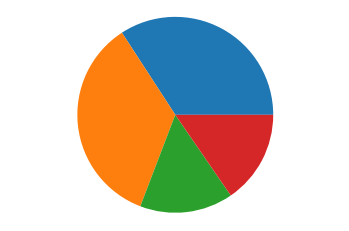

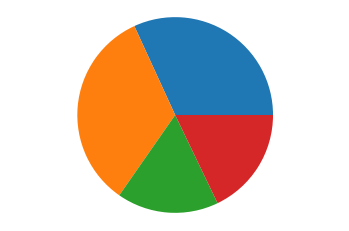

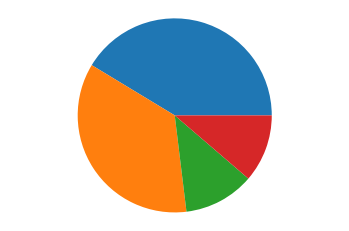

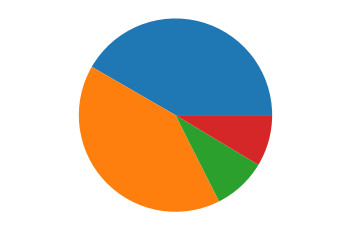

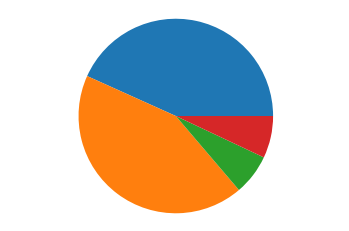

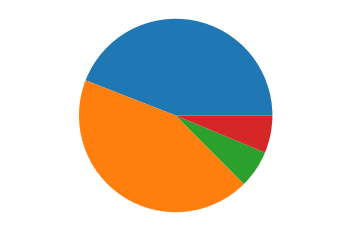

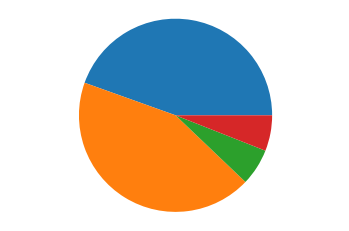

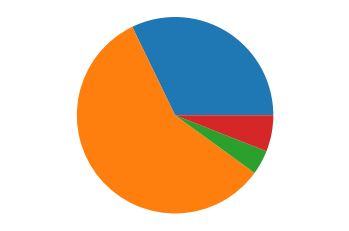

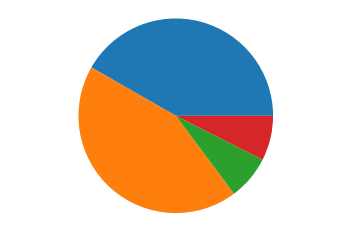

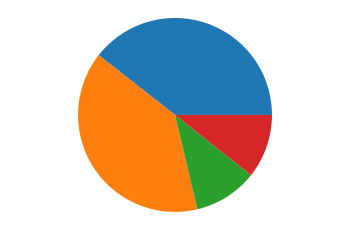

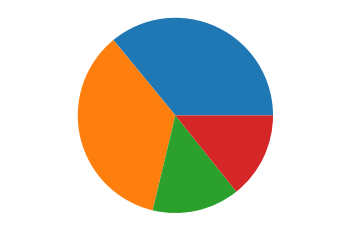

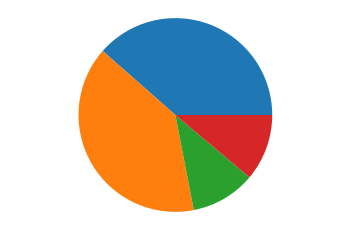

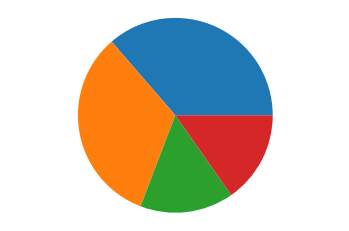

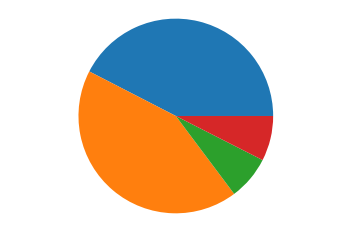

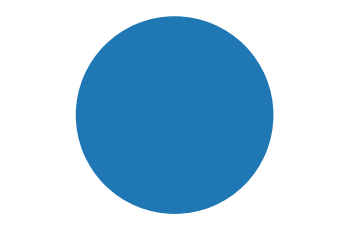

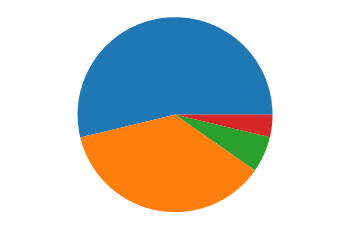

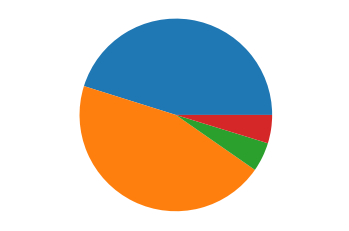

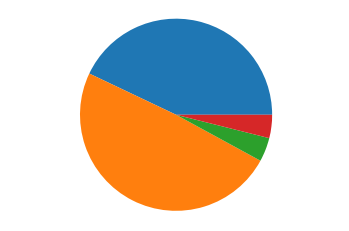

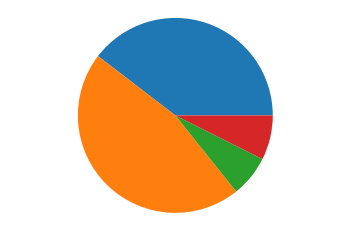

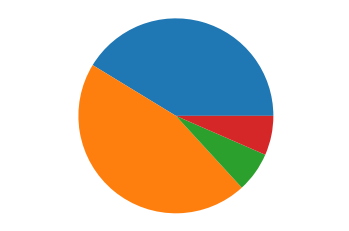

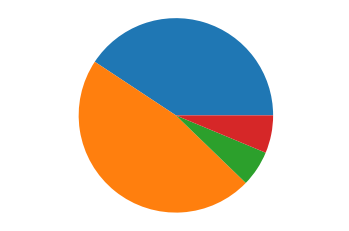

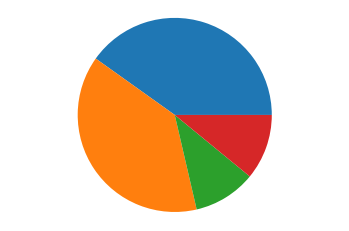

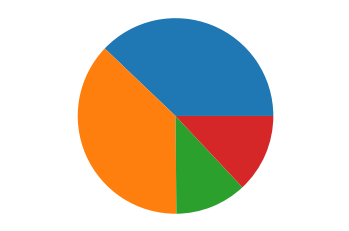

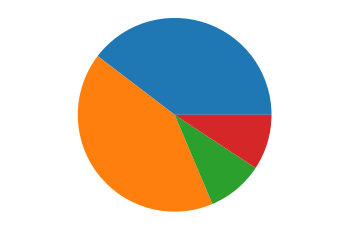

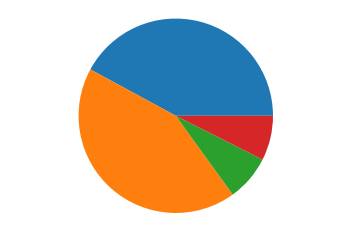

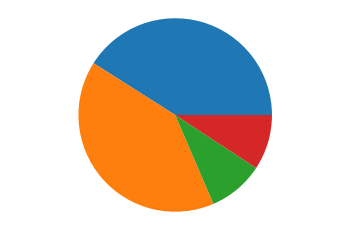

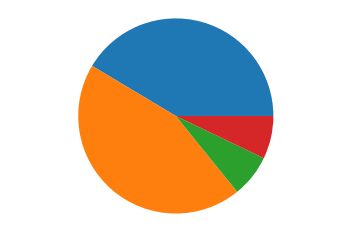

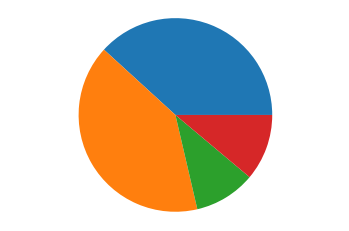

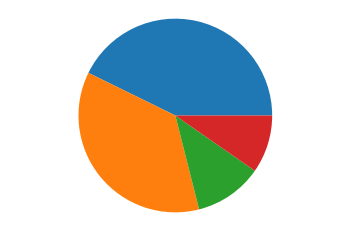

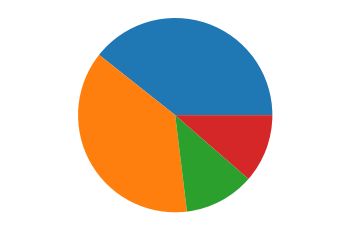

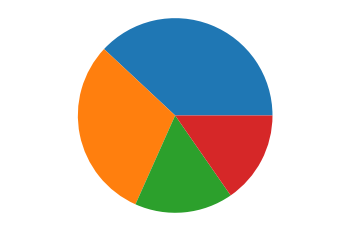

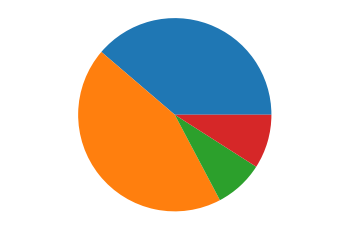

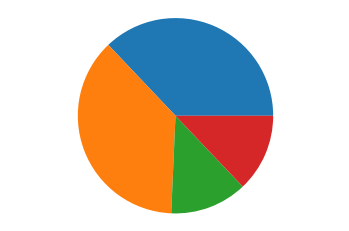

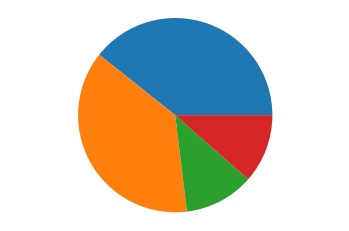

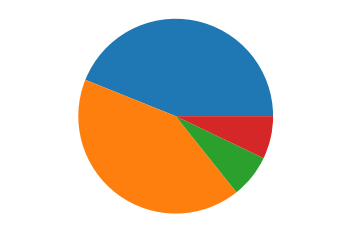

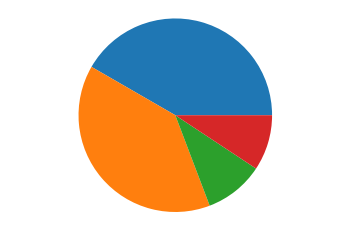

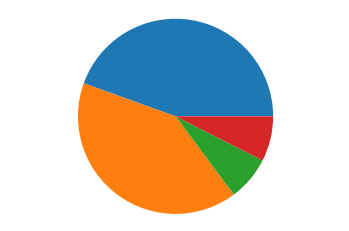

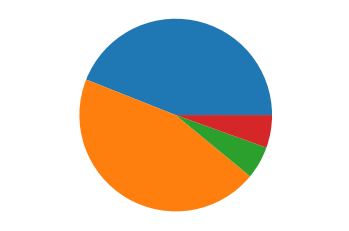

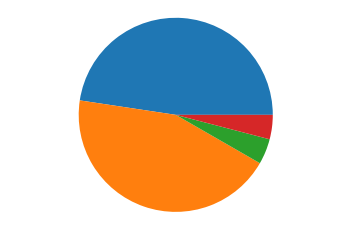

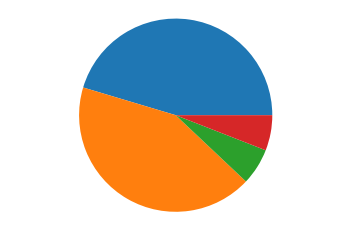

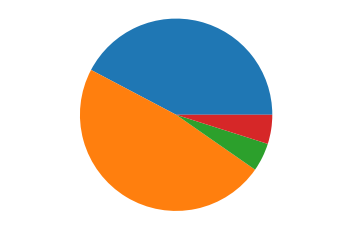

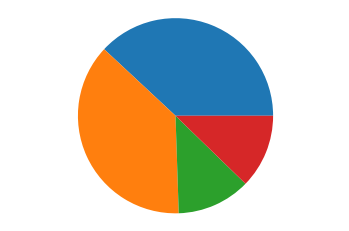

KeyboardInterrupt: 

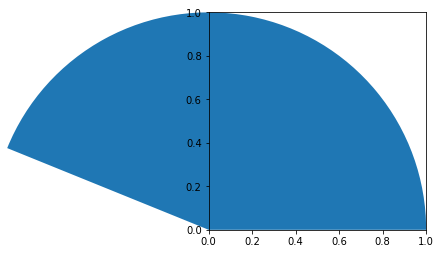

In [27]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

label = ['유임승차', '무임승차', '유임하차', '무임하차']

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    plt.pie(row[4:8])
    plt.axis('equal')
    plt.show()

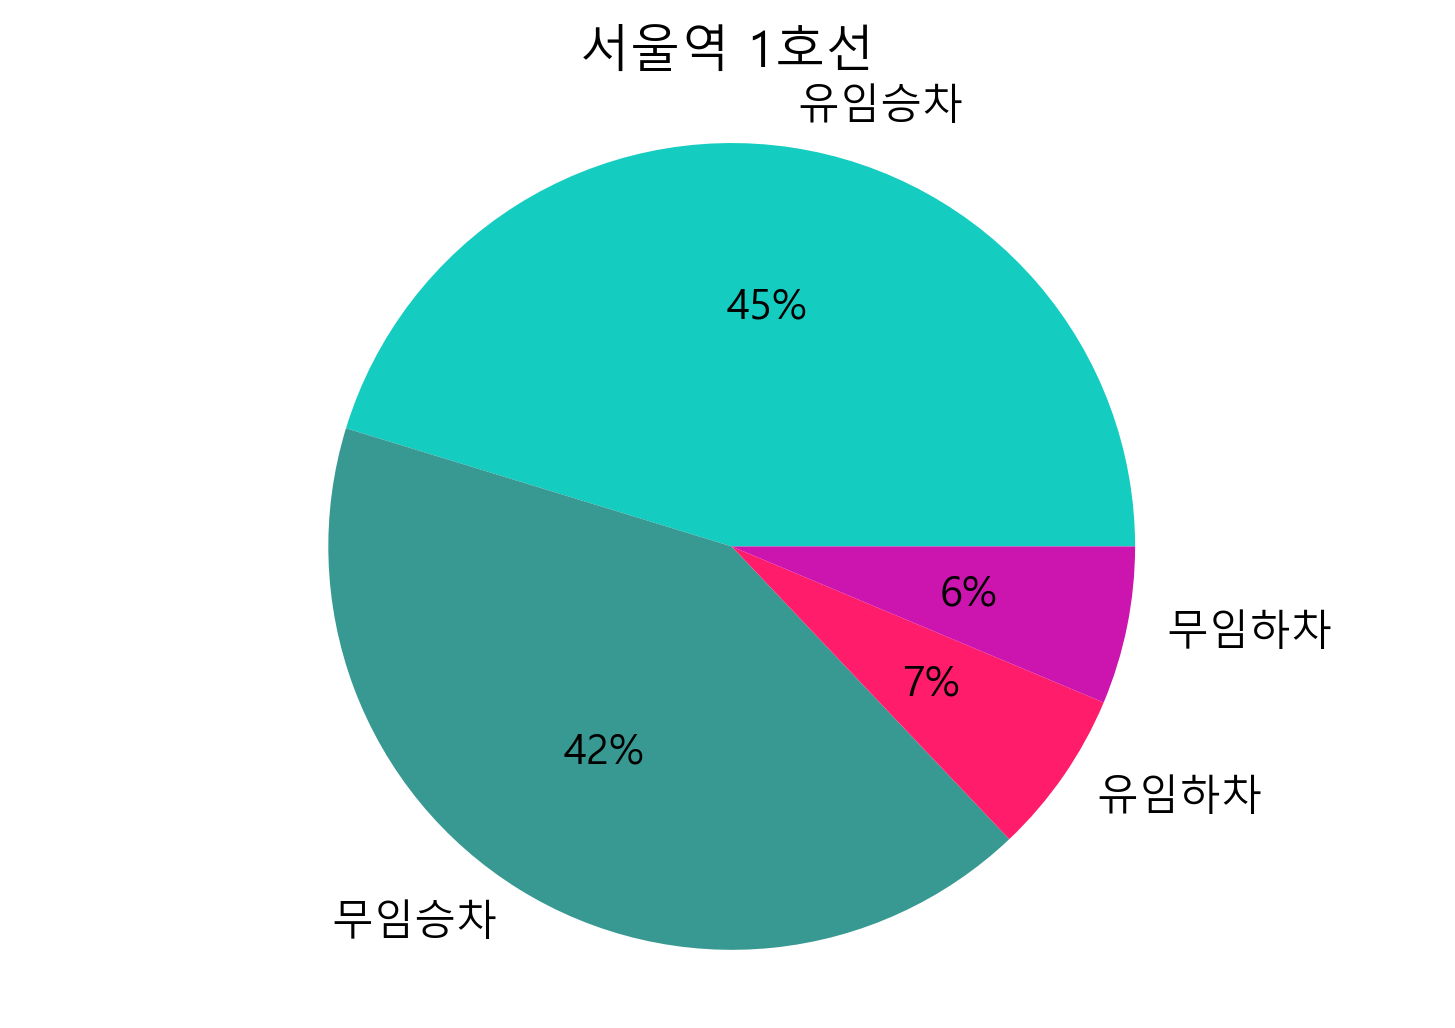

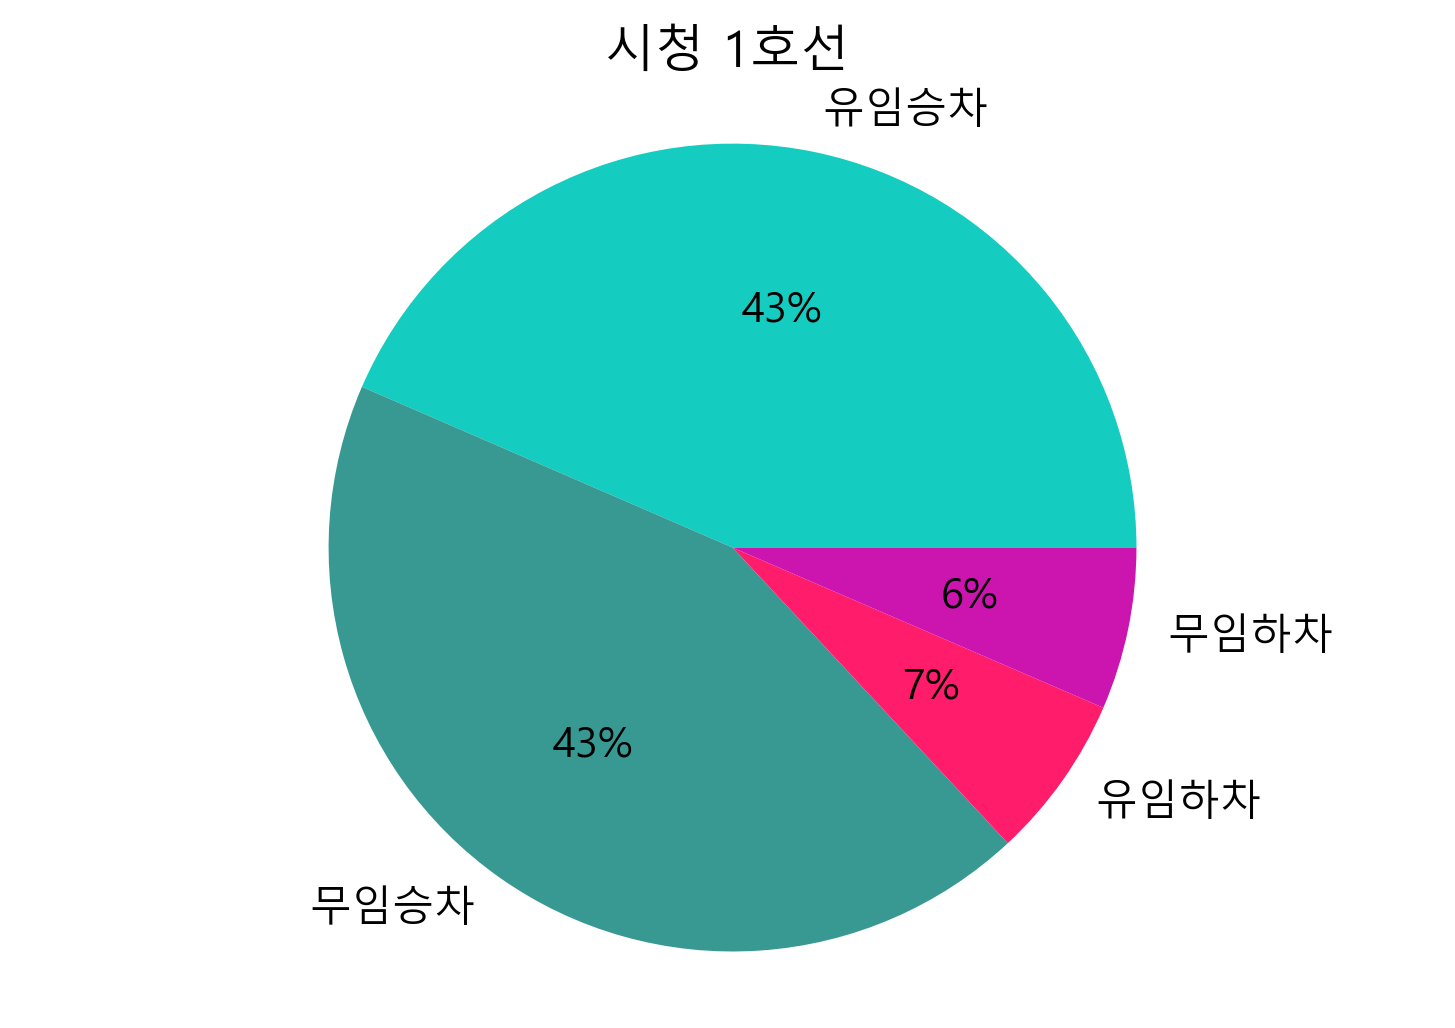

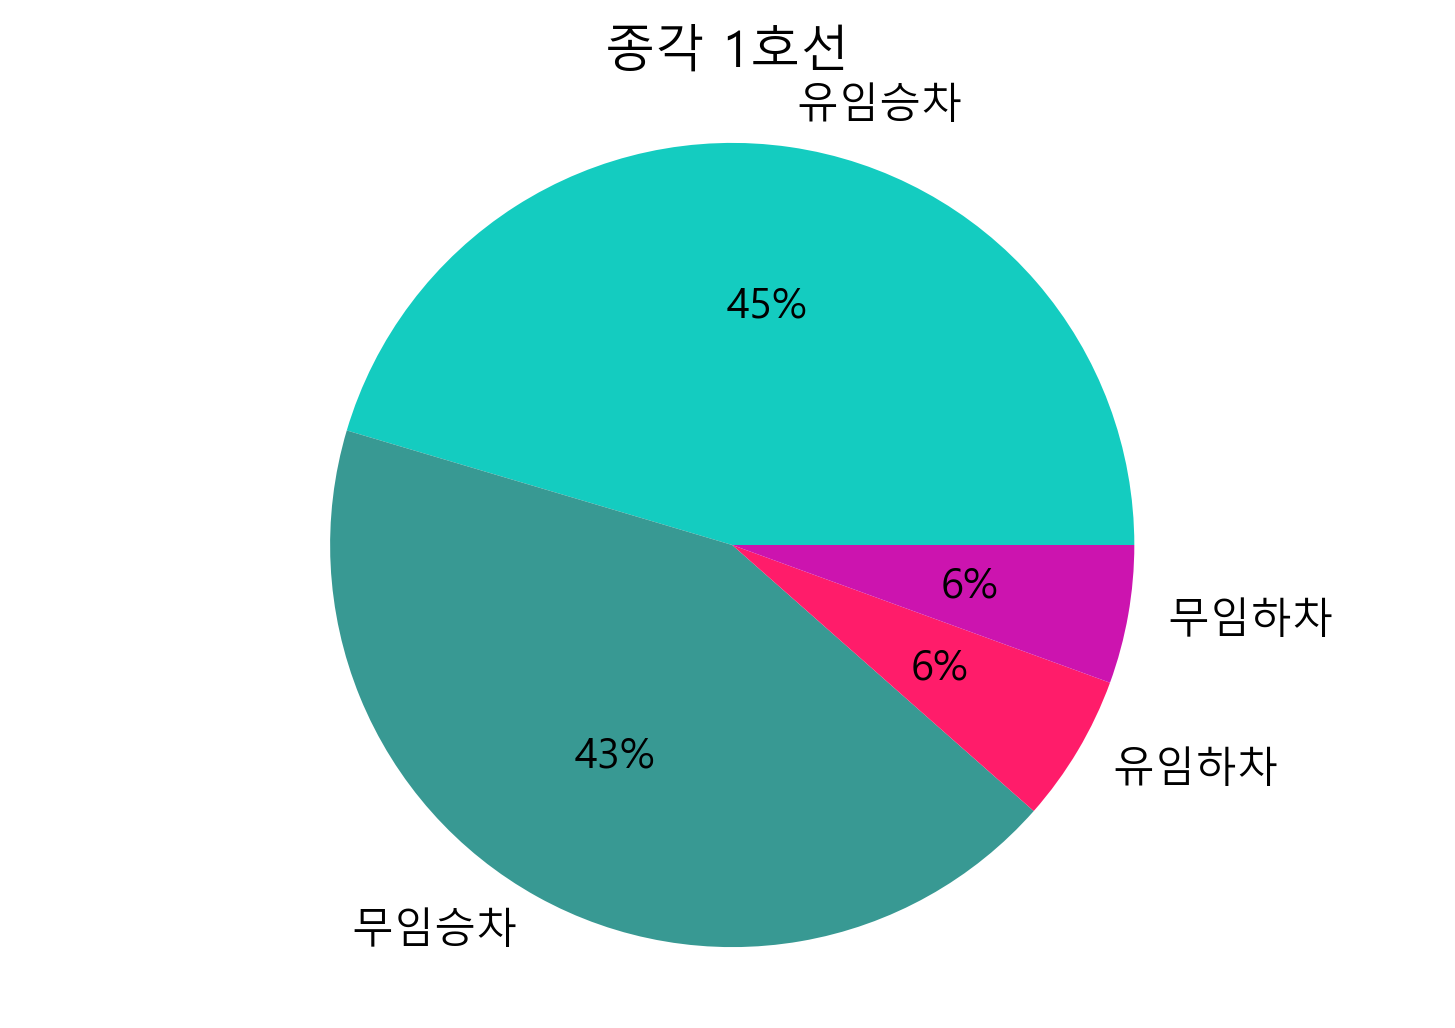

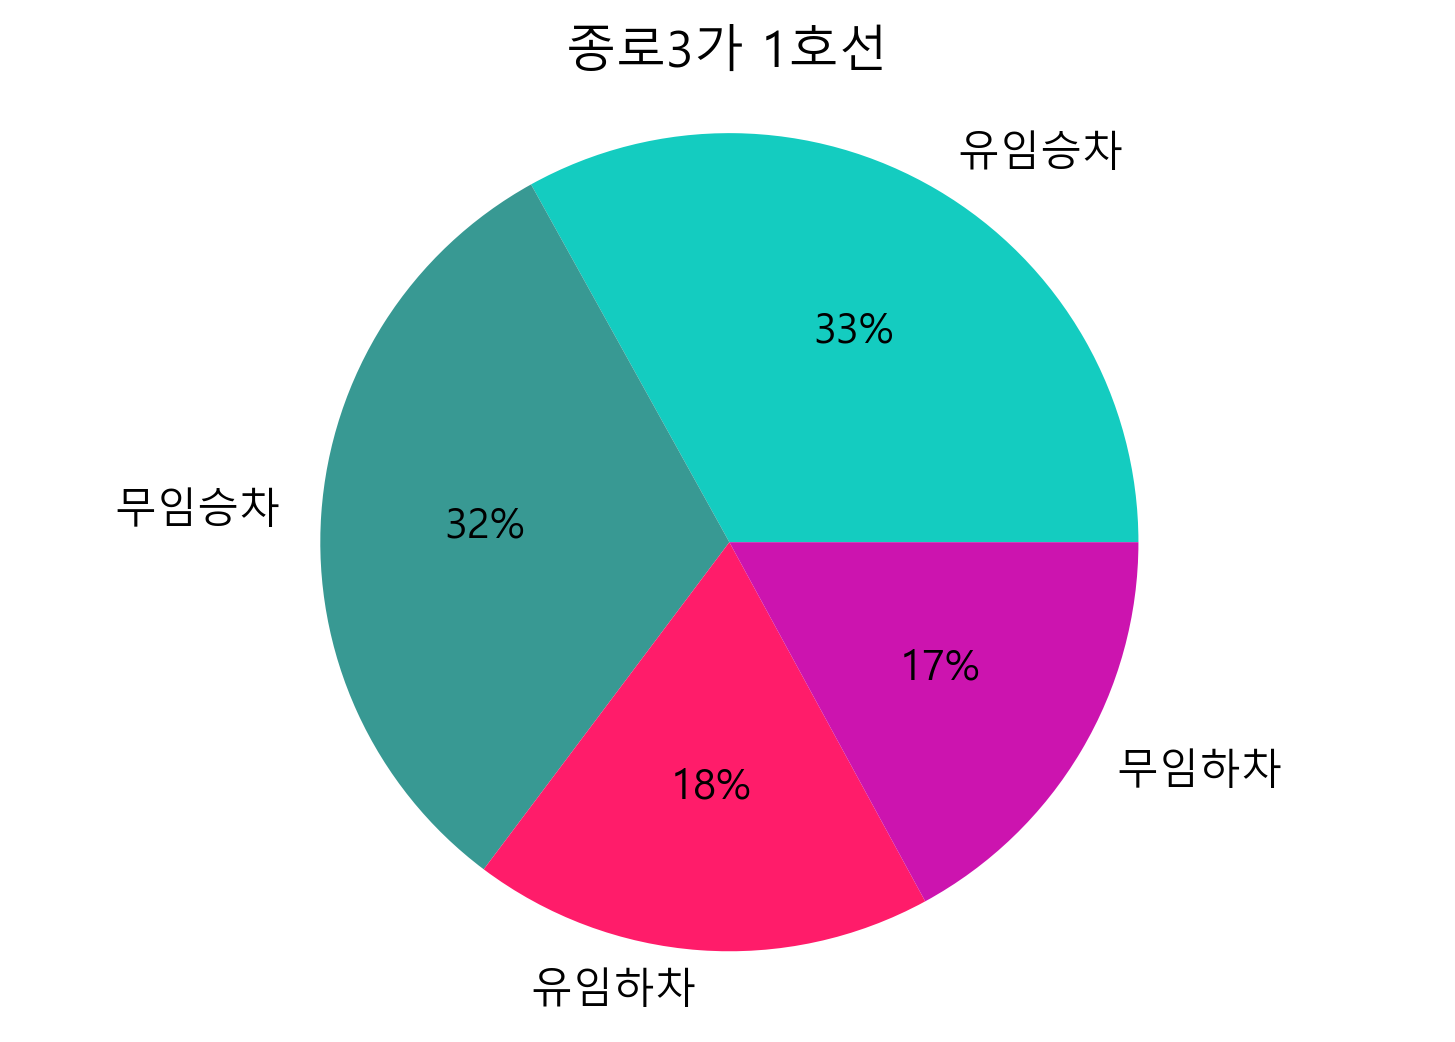

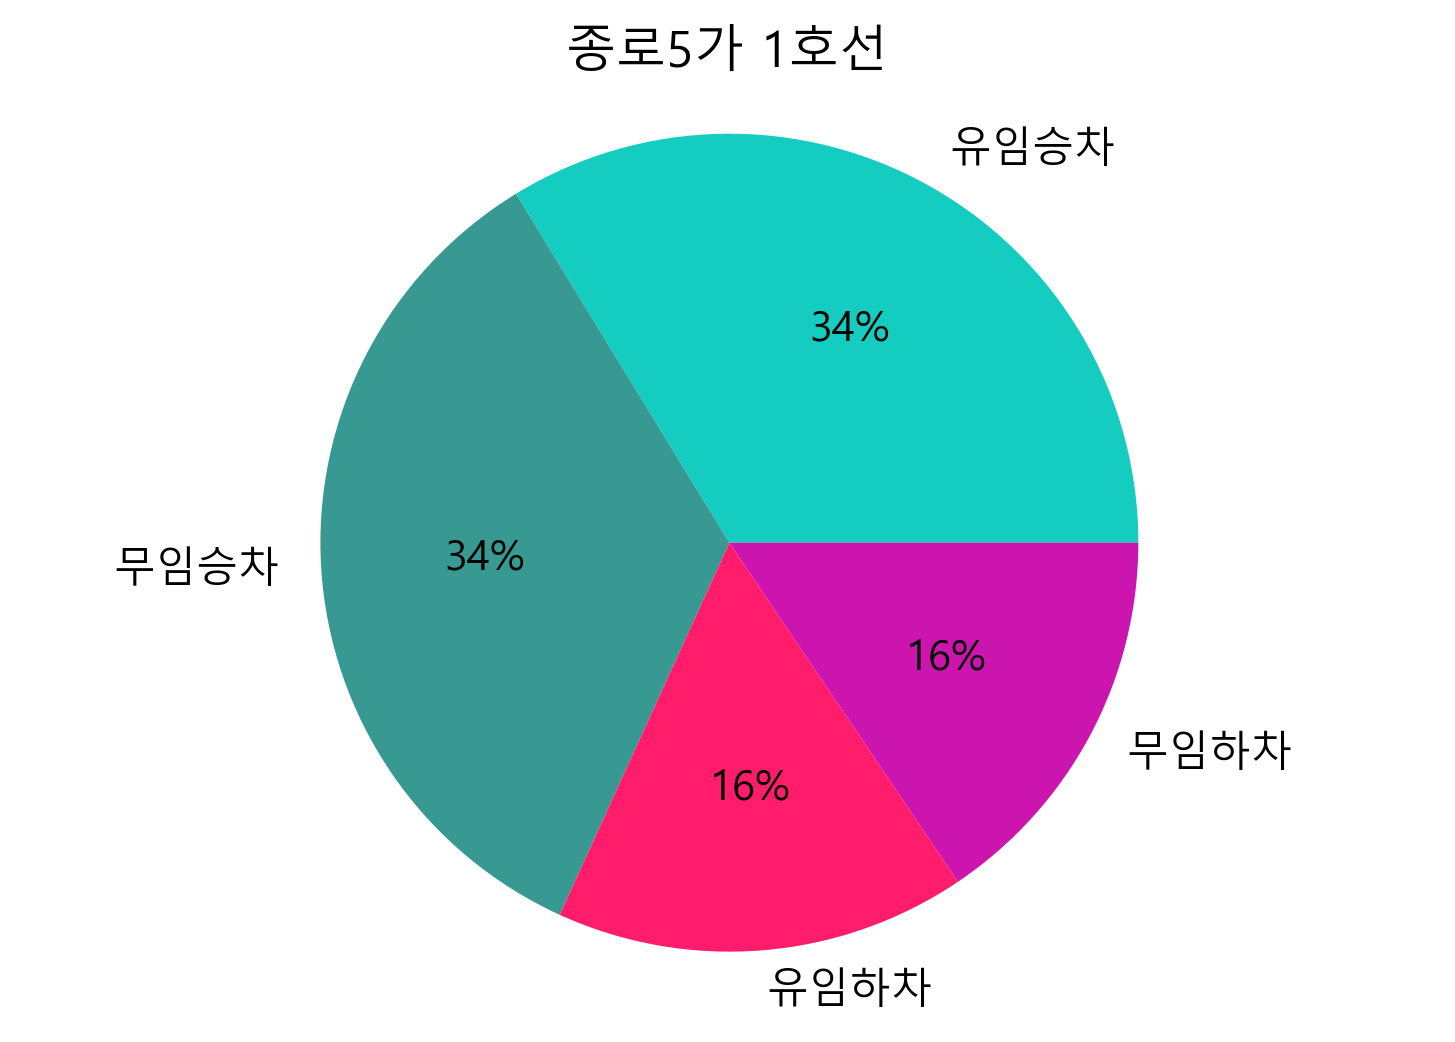

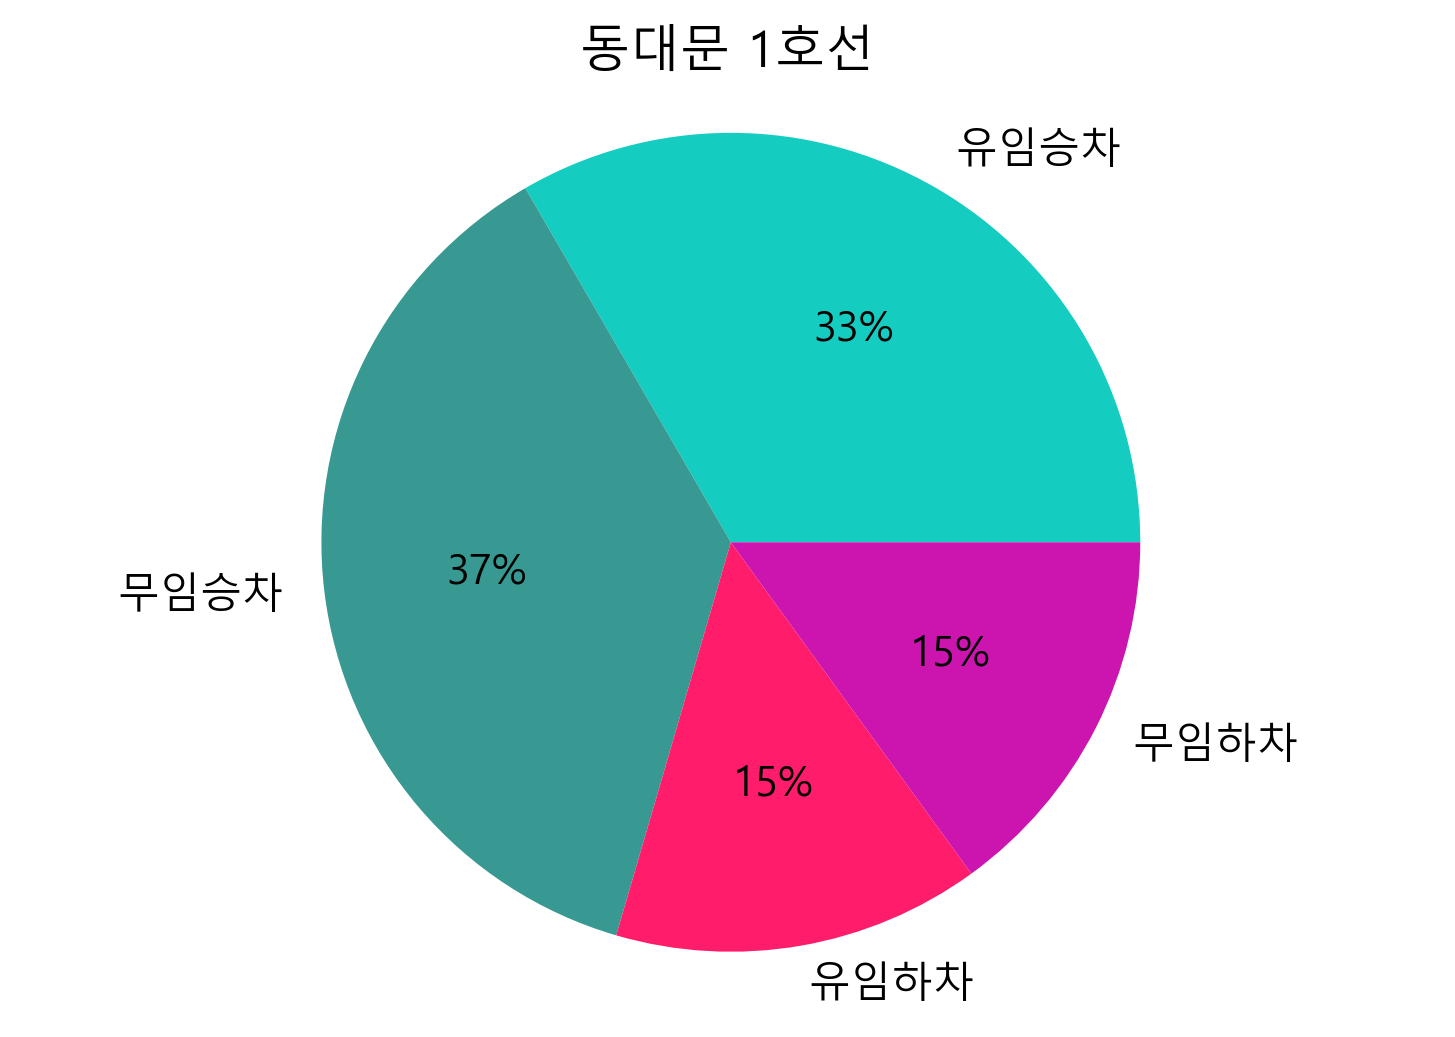

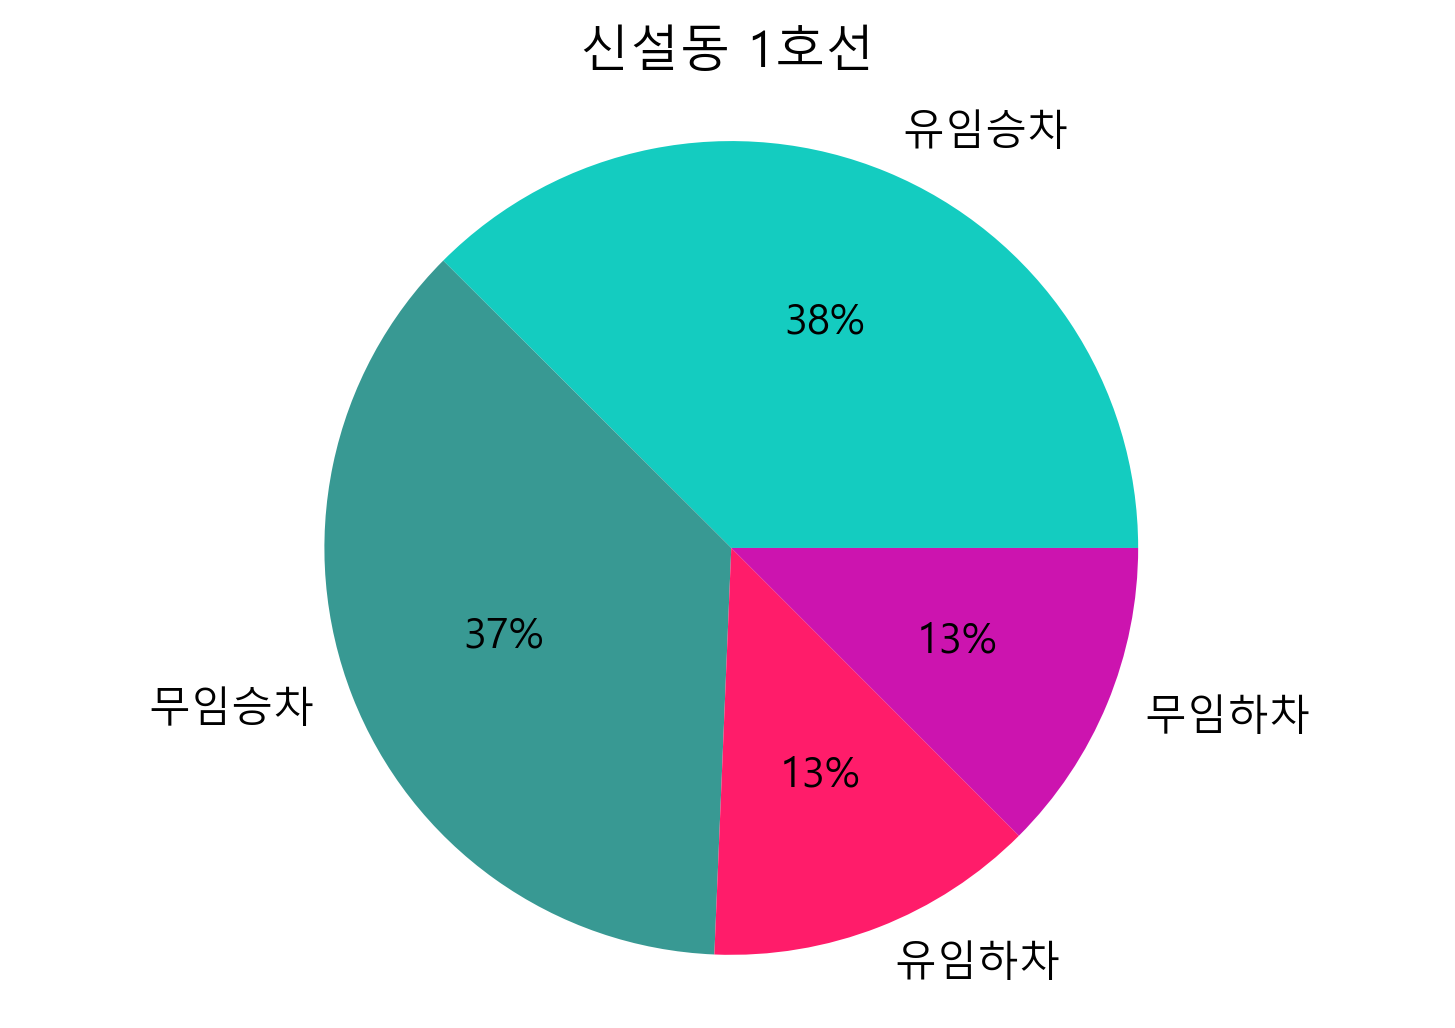

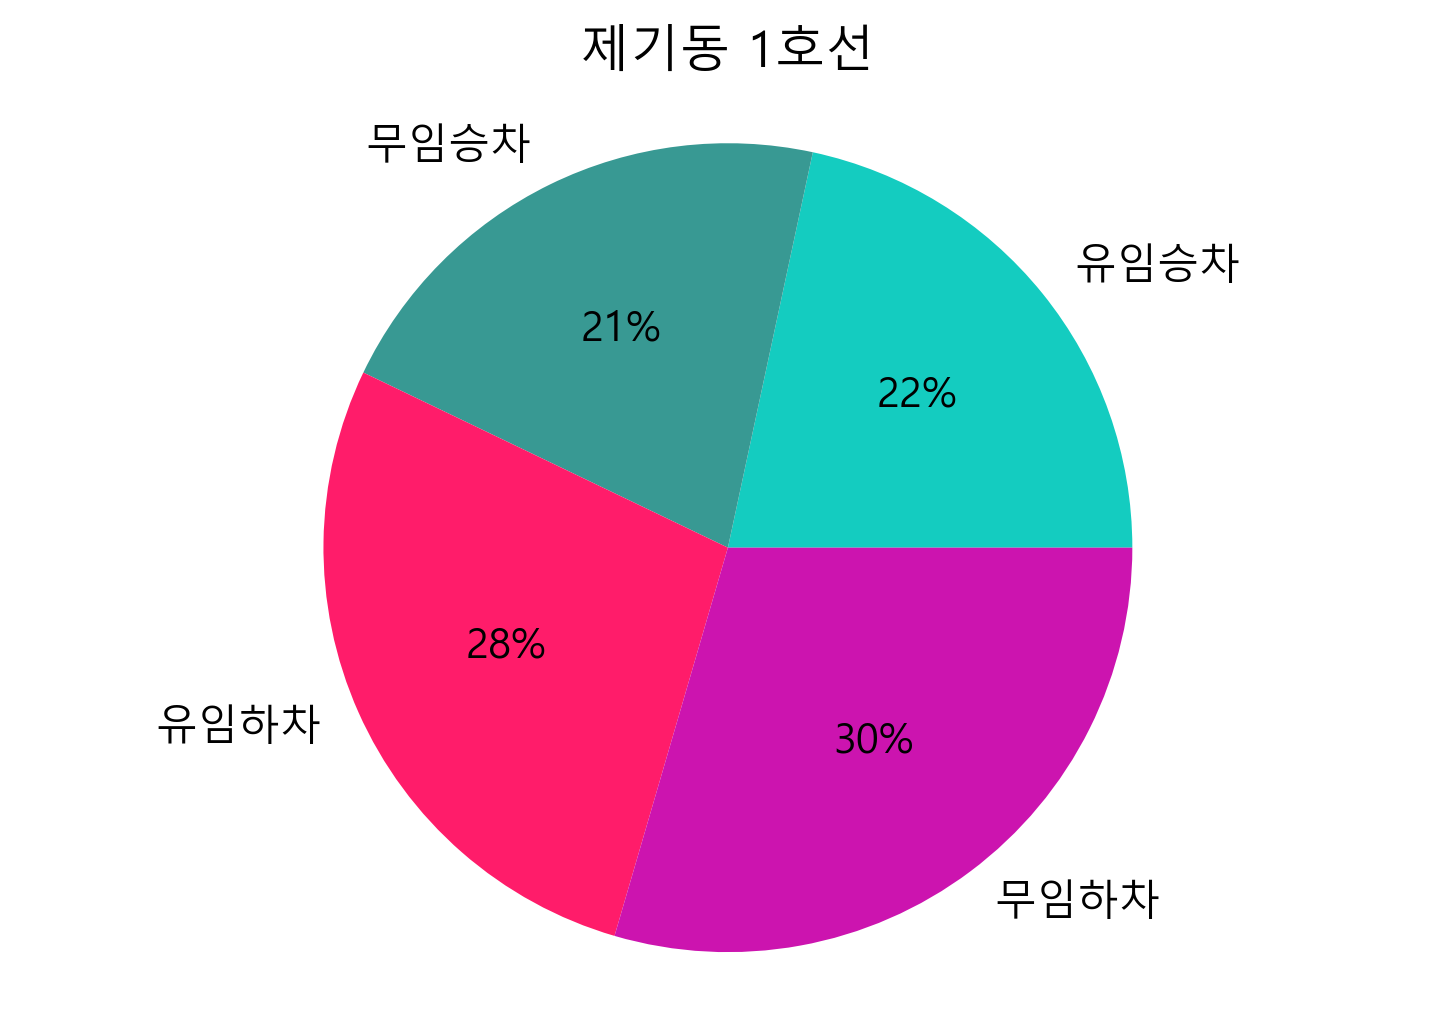

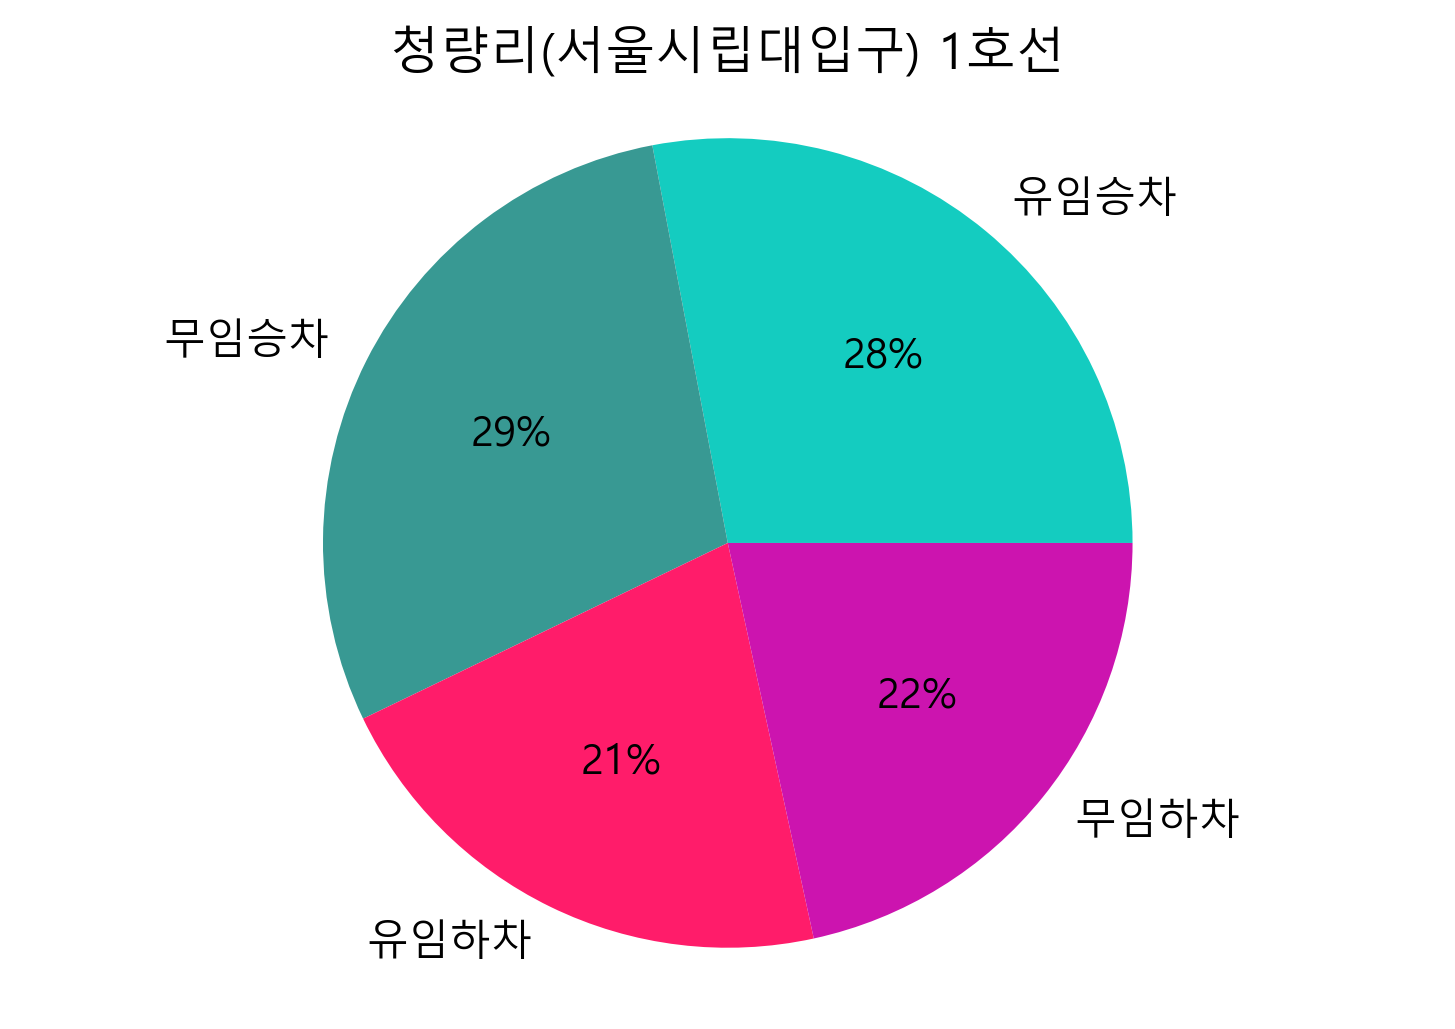

KeyboardInterrupt: 

In [29]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

label = ['유임승차', '무임승차', '유임하차', '무임하차']

c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']

plt.rc('font', family = 'Malgun Gothic')

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    plt.figure(dpi=300)
    plt.title(row[3] + ' ' + row[1]) 
    plt.pie(row[4:8], labels=label, colors=c, autopct='%1.f%%')
    plt.axis('equal')
    plt.show()

#### 모든 역의 유무임 승하차 비율을 파이 차트로 나타내기

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

label = ['유임승차', '무임승차', '유임하차', '무임하차']

c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']

plt.rc('font', family = 'Malgun Gothic')

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    plt.figure(dpi=300)
    plt.title(row[3] + ' ' + row[1]) 
    plt.pie(row[4:8], labels=label, colors=c, autopct='%1.f%%')
    plt.axis('equal')
    plt.savefig(row[3] + ' ' + row[1] + '.png') # 파이 차트를 이미지 파일로 저장
    plt.show()